# EG21 CITE-seq and flow cytometry comparisons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
from ridgeplot import ridgeplot

import sklearn.mixture

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


Sample used in this notebook is EG21. 

### Sample information:
- ALL 
- collected at diagnosis
- 95% of bonemarrow cells are blasts


In [13]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')

adata.shape

(298991, 8051)

In [14]:
adata_prot_clr= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_clr (1).h5ad')

In [15]:
adata_prot_clr.shape

(147889, 33)

In [4]:
#convert excel to csv (flow data)

#read_file = pd.read_excel (r'/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.xlsx')
#read_file.to_csv (r'/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.csv', index = None, header=True)

In [27]:
#get flow data

flow= pd.read_csv('/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.csv')

In [112]:
#Selecting EG21 sample
eg=adata[adata.obs['eg_code'] == 'EG21']

eg.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,SAMPLE_SET,SAMPLE_TYPE,SAMPLE_TISSUE,DIAGNOSIS,SUBTYPE,STATUS,eg_code,leiden_r1,new_cell_type,batch_group
AAACCTGAGTCAAGGC-1-132,leukemic,3502,0.027531,0.221687,11841.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,10,leukemic,Easi
AAACCTGCAATGTAAG-1-132,leukemic,963,0.031618,0.234346,1613.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,20,leukemic,Easi
AAACCTGCATGCAACT-1-132,leukemic,559,0.049102,0.209581,835.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,20,leukemic,Easi
AAACCTGGTCTGGTCG-1-132,leukemic,3995,0.018124,0.319445,13849.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,10,leukemic,Easi
AAACCTGGTGCAACGA-1-132,leukemic,3180,0.033350,0.311335,9925.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,10,leukemic,Easi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAGTCGTGC-1-132,leukemic,2414,0.023199,0.260652,6595.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,10,leukemic,Easi
TTTGTCAGTCTCATCC-1-132,leukemic,512,0.072323,0.205841,719.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,20,leukemic,Easi
TTTGTCAGTGCGCTTG-1-132,leukemic,2869,0.016867,0.273290,7589.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,10,leukemic,Easi
TTTGTCAGTTGGACCC-1-132,leukemic,1466,0.037591,0.231752,2740.0,NaN,NaN,NaN,NaN,False,...,F,dg,BM,B-ALL,t(9;22)(q34;q11.2);BCR-ABL1,NaN,EG21,20,leukemic,Easi


In [6]:
eg.obs['new_cell_type']

AAACCTGAGTCAAGGC-1-132     leukemic
AAACCTGCAATGTAAG-1-132     leukemic
AAACCTGCATGCAACT-1-132     leukemic
AAACCTGGTCTGGTCG-1-132     leukemic
AAACCTGGTGCAACGA-1-132     leukemic
                            ...    
TTTGTCACAGTCGTGC-1-132     leukemic
TTTGTCAGTCTCATCC-1-132     leukemic
TTTGTCAGTGCGCTTG-1-132     leukemic
TTTGTCAGTTGGACCC-1-132     leukemic
TTTGTCATCAAACGGG-1-132    doublets?
Name: new_cell_type, Length: 2394, dtype: category
Categories (5, object): ['NK', 'doublets?', 'leukemic', 'leukemic?', 'non-leukemic']

In [14]:
eg_blasts=eg[eg.obs['new_cell_type'] == 'leukemic']

In [15]:
#selecting only leukemic cells

eg_blasts=eg[eg.obs['new_cell_type'] == 'leukemic']

eg_blasts.obs['new_cell_type']

AAACCTGAGTCAAGGC-1-132    leukemic
AAACCTGCAATGTAAG-1-132    leukemic
AAACCTGCATGCAACT-1-132    leukemic
AAACCTGGTCTGGTCG-1-132    leukemic
AAACCTGGTGCAACGA-1-132    leukemic
                            ...   
TTTGGTTTCGCGGATC-1-132    leukemic
TTTGTCACAGTCGTGC-1-132    leukemic
TTTGTCAGTCTCATCC-1-132    leukemic
TTTGTCAGTGCGCTTG-1-132    leukemic
TTTGTCAGTTGGACCC-1-132    leukemic
Name: new_cell_type, Length: 2105, dtype: category
Categories (1, object): ['leukemic']

### Depending on used dataset, celltype annotations are varying (made by different groups). "new_cell_types" is made based on these, it is a "standardized" version of cell type annotations. 

In [29]:
#Cell types offered by new_cell_type

adata.obs['new_cell_type'].unique().tolist()

['NK',
 'T',
 'Prog',
 'Myel',
 'B',
 'DC',
 'E',
 'Normoblast',
 'Stromal',
 'Megakaryocyte',
 nan,
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [30]:
#cell type annotations offered by cell_type

adata.obs['cell_type'].unique().tolist()

['NK',
 'CD8+ T CD69+ CD45RA+',
 'NK CD158e1+',
 'HSC',
 'CD14+ Mono',
 'B1 B IGKC+',
 'CD4+ T activated',
 'CD8+ T CD69+ CD45RO+',
 'G/M prog',
 'Naive CD20+ B IGKC-',
 'CD8+ T CD49f+',
 'Naive CD20+ B IGKC+',
 'CD4+ T naive',
 'CD8+ T naive',
 'CD4+ T activated integrinB7+',
 'cDC2',
 'gdT TCRVD2+',
 'CD8+ T TIGIT+ CD45RO+',
 'CD16+ Mono',
 'Erythroblast',
 'MAIT',
 'T reg',
 'gdT CD158b+',
 'Transitional B',
 'Proerythroblast',
 'CD8+ T CD57+ CD45RO+',
 'Plasmablast IGKC+',
 'ILC1',
 'Lymph prog',
 'ILC',
 'MK/E prog',
 'Normoblast',
 'CD8+ T CD57+ CD45RA+',
 'pDC',
 'B1 B IGKC-',
 'Plasma cell IGKC-',
 'Plasmablast IGKC-',
 'Plasma cell IGKC+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T naive CD127+ CD26- CD101-',
 'CD4+ T CD314+ CD45RA+',
 'cDC1',
 'T prog cycling',
 'dnT',
 'Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'CD8 Memory_1',
 'Memory B',
 'CD56 bright NK',
 'Prog_B 2

### Files containing DSB and CLR normalized protein counts, do not have cell type annotations, but instead "predicted.id". 

In [21]:
adata_prot_clr.obs['predicted.id'].unique().tolist()

['NK T 1',
 'NK',
 'CD4+ T 1',
 'CD14+ monocyte 2',
 '7_immatureB',
 'CD14+ monocyte 1',
 'NK T 2',
 'Early erythoid precursor',
 'Late erythoid precursor 1',
 '5_preB_G2MS',
 'Conventional dendritic cell',
 'CD4+ T 3',
 'Late erythoid precursor 2',
 'Promonocyte',
 'Stromal cell',
 '4_proB_G1',
 '3_proB_G2MS',
 'HSC',
 '6_preB-II_G1',
 'Megakaryocyte',
 'Plasmacytoid dendritic cell',
 '2_earlyLymphoid',
 'CD16+ monocyte',
 '6_preB_G1',
 'Plasma B cell',
 'Late erythoid precursor 3',
 'Stromal cell like',
 'CD8+ T']

## Proportions using predicted_id

In [16]:
eg_blasts

View of AnnData object with n_obs × n_vars = 2105 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [49]:
#Checking what king of values we have for EG24

egflow=flow[flow['EG_code'] == 'EG21'].dropna(axis=1)

egflow

,EG_code,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,EG21,1.0,1.0,1.0,0.44,1.0,1.0,1.0


In [50]:
#drop EG_code

egflow=egflow.drop("EG_code", axis=1)

egflow

,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,1.0,1.0,1.0,0.44,1.0,1.0,1.0


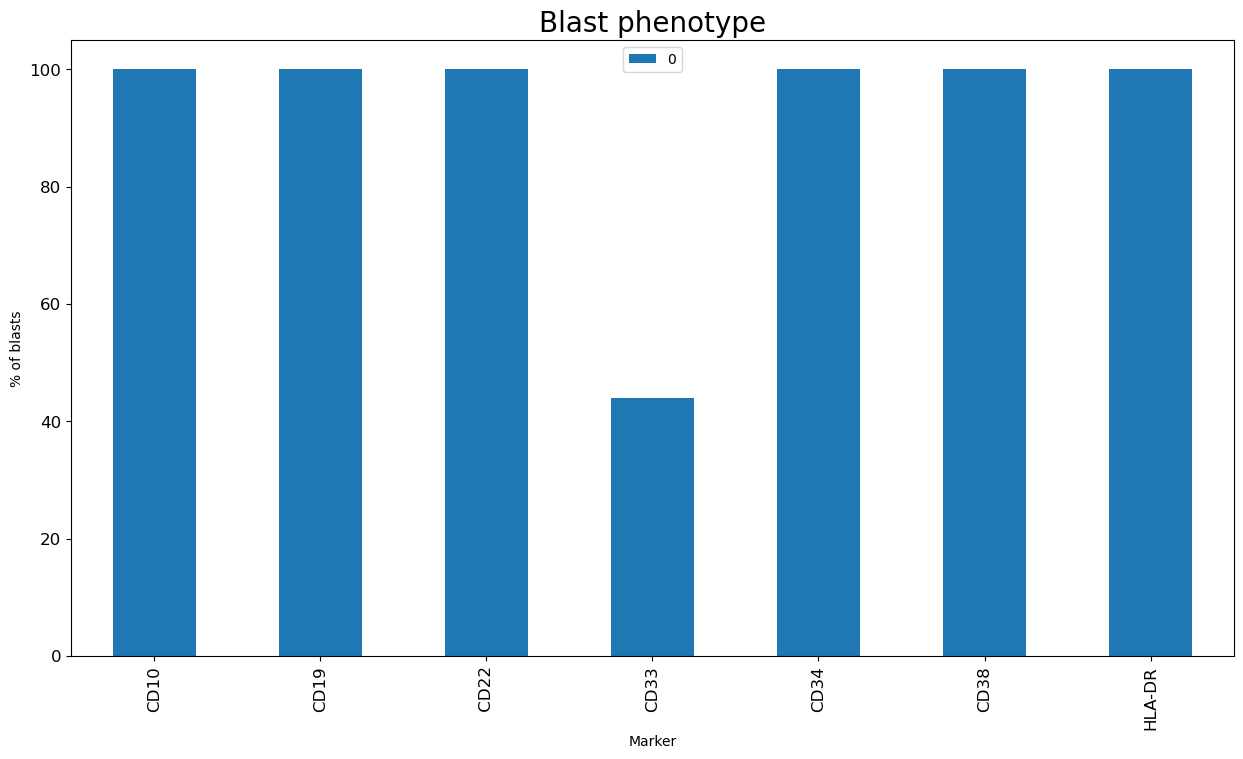

In [136]:
df=egflow * 100 #multiplied by 100 to get percentages

df1=df.T

df1.plot.bar(xlabel="Marker", ylabel="% of blasts",
            figsize= (15,8),
           fontsize="large") ;

plt.title('Blast phenotype', fontsize=20) ;

In [137]:
flow_markers=egflow.columns
flow_markers

Index(['CD10', 'CD19', ' CD22', 'CD33', 'CD34', 'CD38', 'HLA-DR'], dtype='object')

In [138]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in eg_blasts.obsm['protein_expression'].columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

CD10 Yes
CD19 Yes
 CD22 No
CD33 Yes
CD34 Yes
CD38 Yes
HLA-DR Yes
['CD10', 'CD19', 'CD33', 'CD34', 'CD38', 'HLA-DR']


In [139]:
#Number of all cells for calculations

all_cells=len(eg_blasts.obs['cell_type'])

all_cells


2105

In [140]:
egflow

,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,1.0,1.0,1.0,0.44,1.0,1.0,1.0


In [141]:
column_names

['CD10', 'CD19', 'CD33', 'CD34', 'CD38', 'HLA-DR']

In [142]:
egflow

,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,1.0,1.0,1.0,0.44,1.0,1.0,1.0


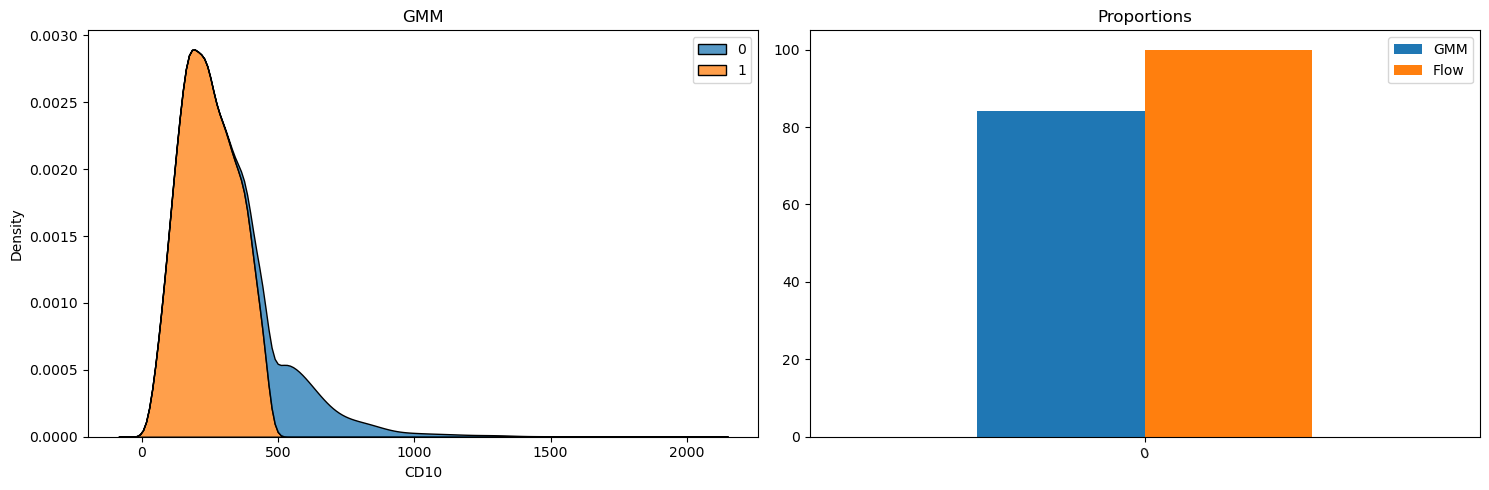

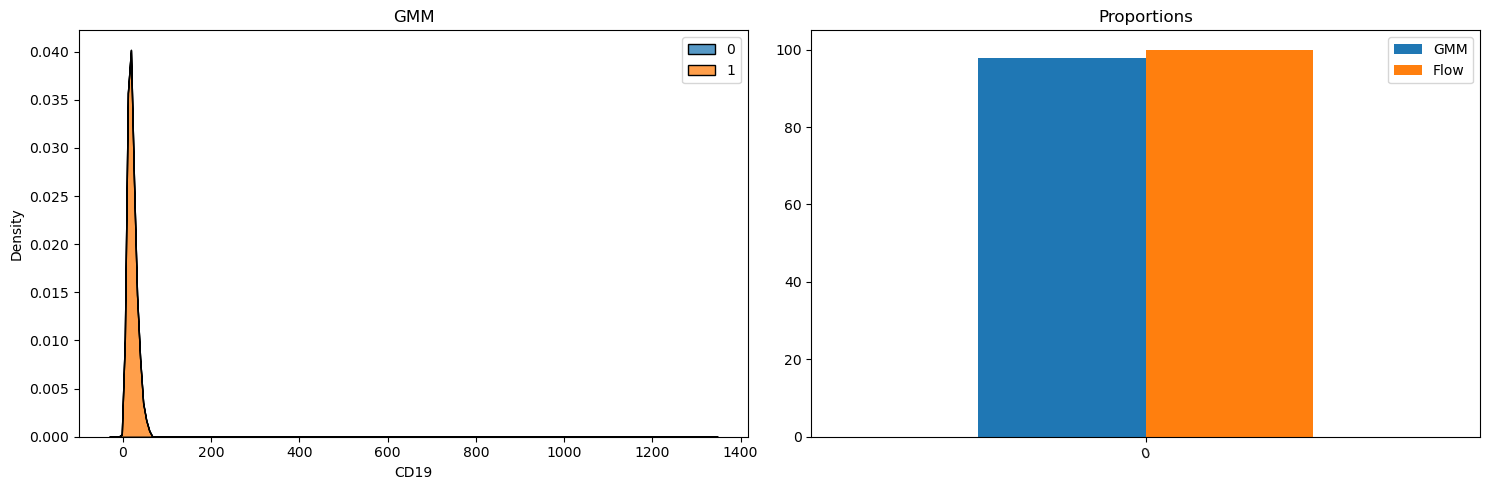

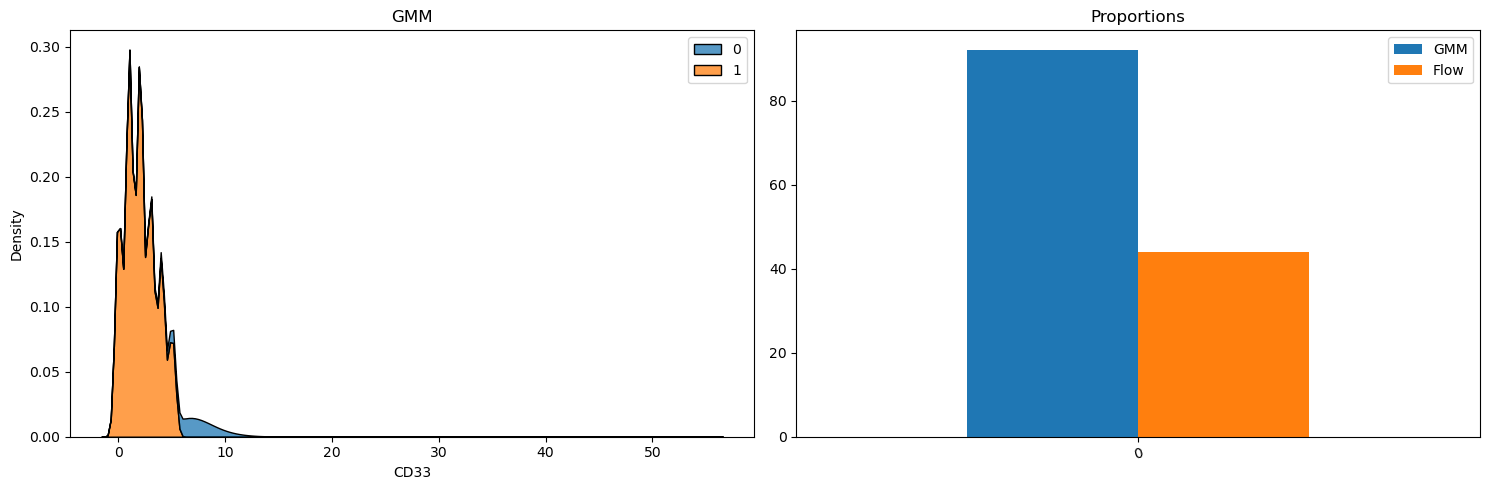

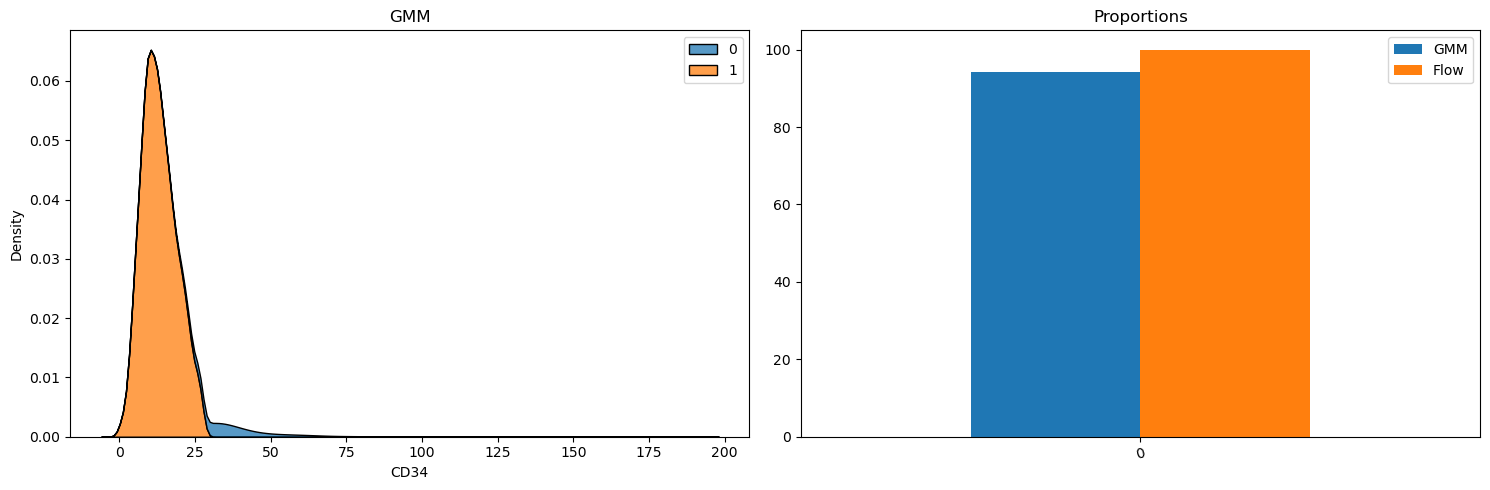

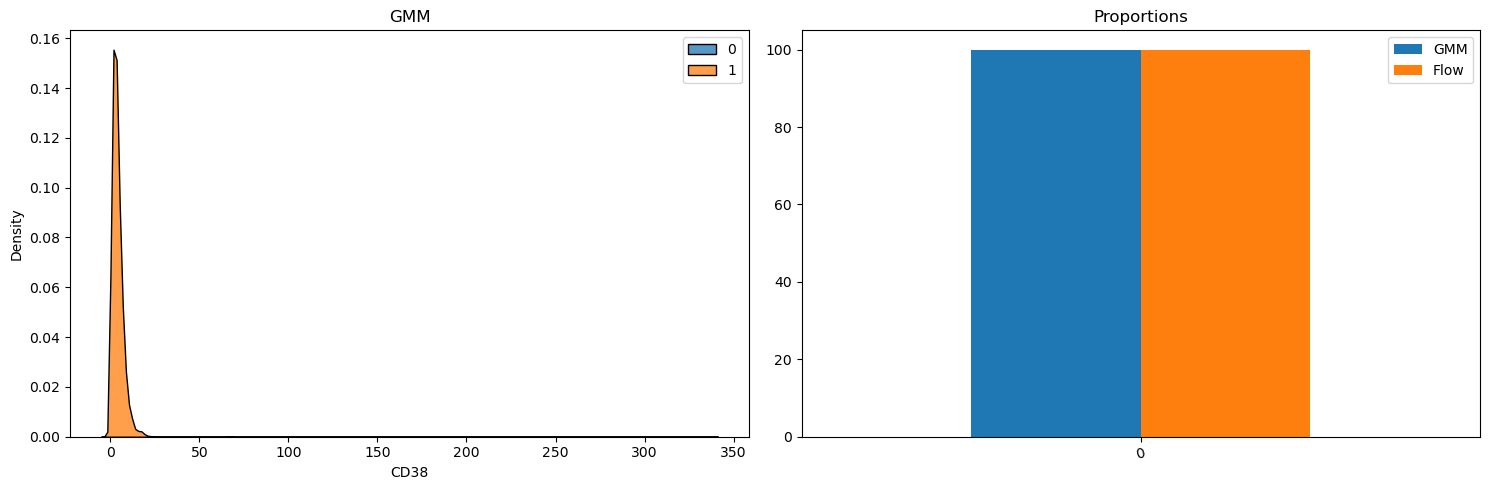

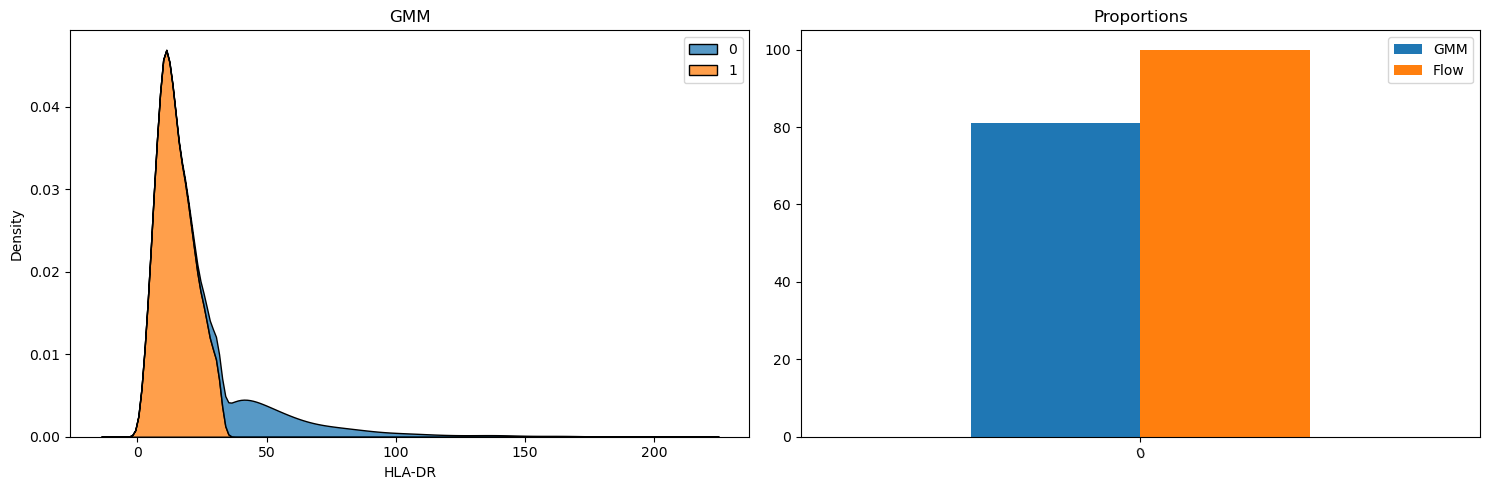

In [143]:
#Only leukemic cells selected, now using GMM to detect positive cells/per each marker

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data=eg_blasts.obsm['protein_expression']
n_cells=len(eg_blasts.obs['cell_type'])
egflow=egflow * 100 #to get percentages

for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    #CLR
    x= data[column_name]
    x=x.values.reshape(-1, 1)
    gmm.fit(x)
    labels = gmm.predict(x)
    
    x0 = data[column_name].reset_index(drop=True)[labels == 0].mean()
    x1 = data[column_name].reset_index(drop=True)[labels == 1].mean()
    if x0 < x1:
        labels = (~(labels == 1)).astype(int)

    ax1 = sns.kdeplot(data=data, x=column_name, hue=labels, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')    
   
    #Calculate zeros
    n_zeros = np.count_nonzero(labels==0)
    result_zeros=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels)
    result_ones=(n_ones/n_cells * 100)
    #Dataframes
    all_data = {"GMM":[result_ones],
        "Flow": egflow[column_name],
        };

    all_data= pd.DataFrame(data=all_data);
    
    ax2=all_data.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    plt.show()

## CLR normalized



In [212]:
#all CLR data

adata_prot_clr= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_clr (1).h5ad')

In [213]:
adata_prot_clr

AnnData object with n_obs × n_vars = 147889 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_score',

In [214]:
eg_norm=adata_prot_clr[adata_prot_clr.obs['EG_code'] == 'EG21']

In [215]:
eg_norm.obs

,nCount_RNA,nFeature_RNA,bc,propmt,rna_size,ngene,prot_size,predicted.id,hashMax,adtMax,...,Th1.Th17_score,Th17_score,Th2_score,T.CD8.Naive_score,T.CD8.CM_score,T.CD8.EM_score,T.CD8.TE_score,T.gd.Vd2_score,T.gd.non.Vd2_score,leiden_r1_prot
AAACCTGAGTCAAGGC-1,11848.0,3502,AAACCTGAGTCAAGGC-1,0.027515,4.073645,3502.0,2.843233,Promonocyte,14.998817,10.500050,...,-0.048419,-0.058883,-0.050467,-0.070734,-0.044224,-0.027183,-0.026599,-0.031382,-0.031110,1
AAACCTGCAATGTAAG-1,1616.0,963,AAACCTGCAATGTAAG-1,0.031559,3.208441,963.0,2.546543,Late erythoid precursor 2,4.069009,5.856373,...,-0.030576,-0.009622,-0.006932,-0.005088,-0.016345,0.010868,-0.016364,-0.022118,-0.016384,3
AAACCTGCATGCAACT-1,836.0,559,AAACCTGCATGCAACT-1,0.049043,2.922206,559.0,2.558709,CD14+ monocyte 1,3.593683,3.537242,...,0.002254,-0.001790,-0.003680,0.004108,-0.006659,0.020056,-0.014520,0.002730,-0.014538,0
AAACCTGGTCTGGTCG-1,13858.0,3995,AAACCTGGTCTGGTCG-1,0.018112,4.141701,3995.0,2.909556,Promonocyte,5.737773,9.012157,...,-0.051152,-0.042782,-0.055605,-0.040551,-0.048192,-0.041325,-0.052492,-0.047070,-0.039916,1
AAACCTGGTGCAACGA-1,9932.0,3180,AAACCTGGTGCAACGA-1,0.033327,3.997037,3180.0,2.954725,7_immatureB,4.069009,8.537240,...,-0.039661,-0.056924,-0.031848,-0.050805,-0.032707,-0.026007,-0.026221,-0.039979,-0.038085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCAAAGCG-1,2308.0,1313,TTTGTCAGTCAAAGCG-1,0.222270,3.363236,1313.0,2.549003,NK,5.350916,4.711847,...,-0.025927,-0.013660,-0.000286,-0.020601,-0.008356,-0.048938,-0.061731,-0.011153,-0.045939,0
TTTGTCAGTCTCATCC-1,720.0,512,TTTGTCAGTCTCATCC-1,0.072222,2.857332,512.0,2.764176,CD4+ T 3,9.109595,4.265634,...,-0.032292,-0.032338,-0.035301,-0.005019,-0.030667,0.022408,0.011857,0.008999,0.007782,0
TTTGTCAGTGCGCTTG-1,7592.0,2869,TTTGTCAGTGCGCTTG-1,0.016860,3.880356,2869.0,2.814913,Late erythoid precursor 2,6.107431,10.129750,...,-0.066969,-0.051514,-0.006209,-0.065754,-0.007720,-0.050960,-0.059562,-0.051967,-0.059636,3
TTTGTCAGTTGGACCC-1,2746.0,1466,TTTGTCAGTTGGACCC-1,0.037509,3.438701,1466.0,2.802774,Late erythoid precursor 2,3.089532,4.186352,...,-0.035692,-0.026567,-0.034643,-0.040710,-0.029081,-0.025422,-0.029621,-0.030174,-0.029658,0


In [216]:
eg_norm.obs['predicted.id'].unique().tolist()

['Promonocyte',
 'Late erythoid precursor 2',
 'CD14+ monocyte 1',
 '7_immatureB',
 '4_proB_G1',
 'NK',
 'NK T 2',
 '3_proB_G2MS',
 'NK T 1',
 'Conventional dendritic cell',
 '6_preB-II_G1',
 'Early erythoid precursor',
 'HSC',
 'Plasmacytoid dendritic cell',
 'CD4+ T 3',
 'CD16+ monocyte',
 'Late erythoid precursor 1',
 'Late erythoid precursor 3']

In [217]:
eg_norm_blasts=eg_norm[eg_norm.obs['predicted.id'] == '7_immatureB']

eg_norm_blasts=eg_norm_blasts.to_df()

eg_norm_blasts

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACCTGGTGCAACGA-1,1.595911,4.454080,0.445859,0.351624,0.934145,0.351624,0.611257,0.611257,0.247575,0.000000,...,0.351624,0.531974,0.445859,1.038845,0.531974,2.623339,1.038845,0.753142,0.247575,1.220176
AAACGGGCAAATTGCC-1,1.454365,2.970697,0.493550,0.241754,0.647941,0.822526,1.715239,0.310891,0.310891,0.375556,...,0.547706,0.694527,0.310891,0.694527,0.739039,1.986510,1.005049,0.694527,0.167479,0.971113
AAACGGGCAACACCTA-1,1.896866,4.269662,0.623520,0.146142,0.664831,0.488238,1.422436,0.580428,0.488238,0.146142,...,0.273624,0.386677,0.273624,0.488238,1.033058,2.867986,0.882214,0.075738,0.000000,1.235206
AAAGTAGCAAGCCCAC-1,1.908461,2.351867,2.342398,0.000000,0.402167,0.583387,0.910346,0.094412,0.466292,0.094412,...,0.180674,0.783055,0.094412,0.827310,0.402167,4.064384,0.949414,0.402167,0.094412,0.637164
AACACGTAGGCTACGA-1,1.601687,3.533310,0.457246,0.326767,0.934489,0.254532,1.842780,0.676100,0.676100,0.254532,...,0.394133,0.516611,0.254532,0.572648,0.572648,2.525546,0.934489,0.572648,0.176671,0.813617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCCGTGTTCCGGCA-1,1.777177,2.646296,0.393177,0.253873,0.091974,0.722559,2.659866,0.393177,1.777177,0.091974,...,0.176196,0.571369,0.091974,0.571369,0.325949,3.226064,1.168054,0.624346,0.176196,0.811983
TTGGCAAAGAGACTTA-1,0.699785,3.865756,0.225804,0.000000,0.760798,0.225804,1.262232,0.760798,0.565308,0.225804,...,0.565308,0.699785,0.490618,0.760798,0.924251,2.222808,1.064702,1.396234,0.119262,0.634805
TTTACTGCAGCCTATA-1,1.422328,2.980388,0.441675,0.169830,0.441675,0.746982,2.106453,0.441675,0.554123,0.000000,...,0.314962,0.554123,0.314962,0.441675,0.746982,2.272112,1.328812,0.655195,0.000000,0.980554
TTTCCTCAGGACATTA-1,1.057841,3.943897,0.360384,0.135079,0.624740,0.894563,1.802029,0.254063,0.135079,0.135079,...,0.360384,0.360384,0.624740,0.456479,0.624740,2.035075,0.544144,0.456479,0.254063,1.464739


In [29]:
#Checking what king of values we have for EG24

egflow=flow[flow['EG_code'] == 'EG21'].dropna(axis=1)

egflow

,EG_code,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,EG21,1.0,1.0,1.0,0.44,1.0,1.0,1.0


In [30]:
#drop EG_code

egflow=egflow.drop("EG_code", axis=1)

egflow

,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,1.0,1.0,1.0,0.44,1.0,1.0,1.0


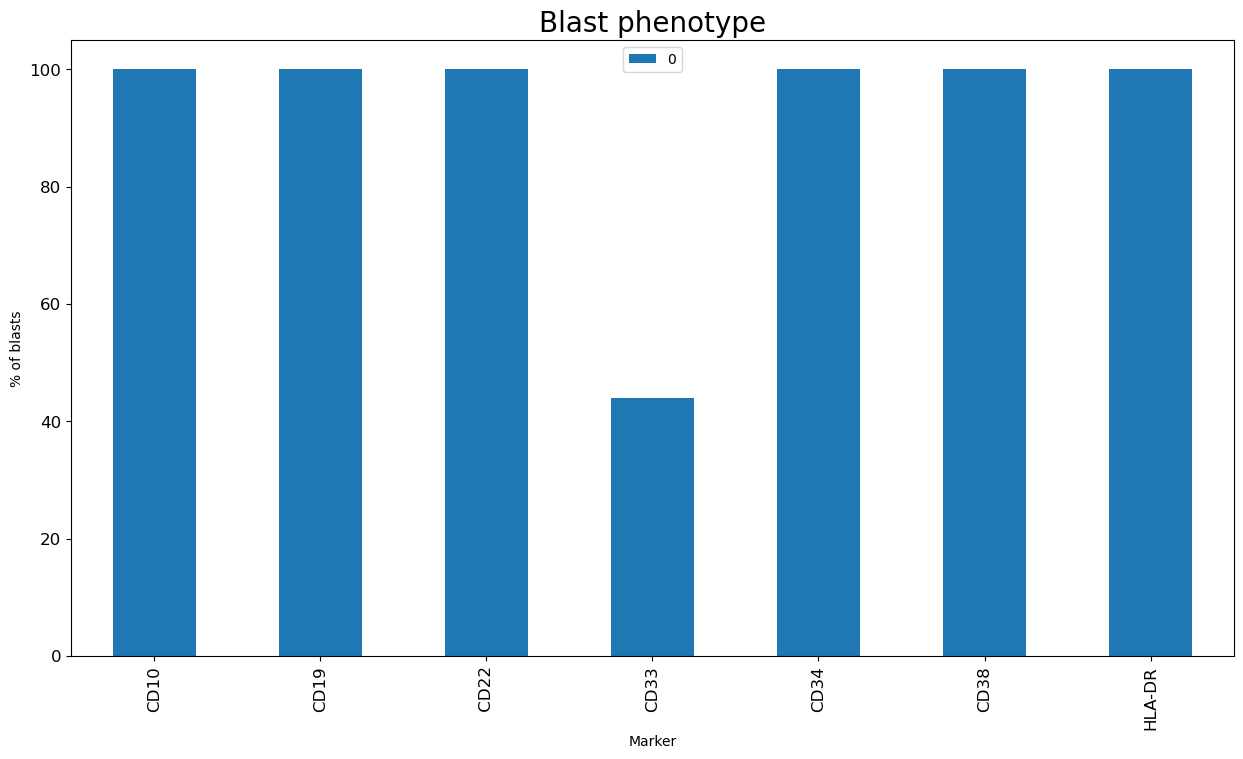

In [31]:
df=egflow * 100 #multiplied by 100 to get percentages

df1=df.T

df1.plot.bar(xlabel="Marker", ylabel="% of blasts",
            figsize= (15,8),
           fontsize="large") ;

plt.title('Blast phenotype', fontsize=20) ;

In [32]:
flow_markers=egflow.columns
flow_markers

Index(['CD10', 'CD19', ' CD22', 'CD33', 'CD34', 'CD38', 'HLA-DR'], dtype='object')

In [34]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in adata_21_leukemic.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

AttributeError: 'AnnData' object has no attribute 'columns'

In [223]:
eg_norm_blasts.shape

(363, 33)

In [224]:
#Number of all cells for calculations

all_cells=len(eg_norm_blasts)

all_cells



363

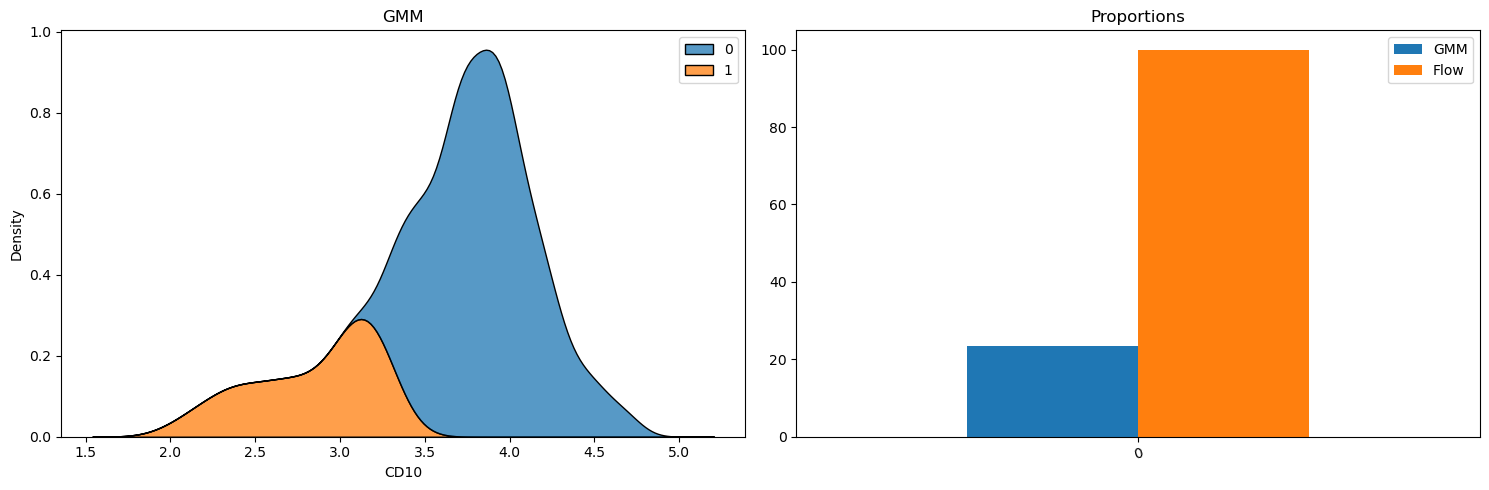

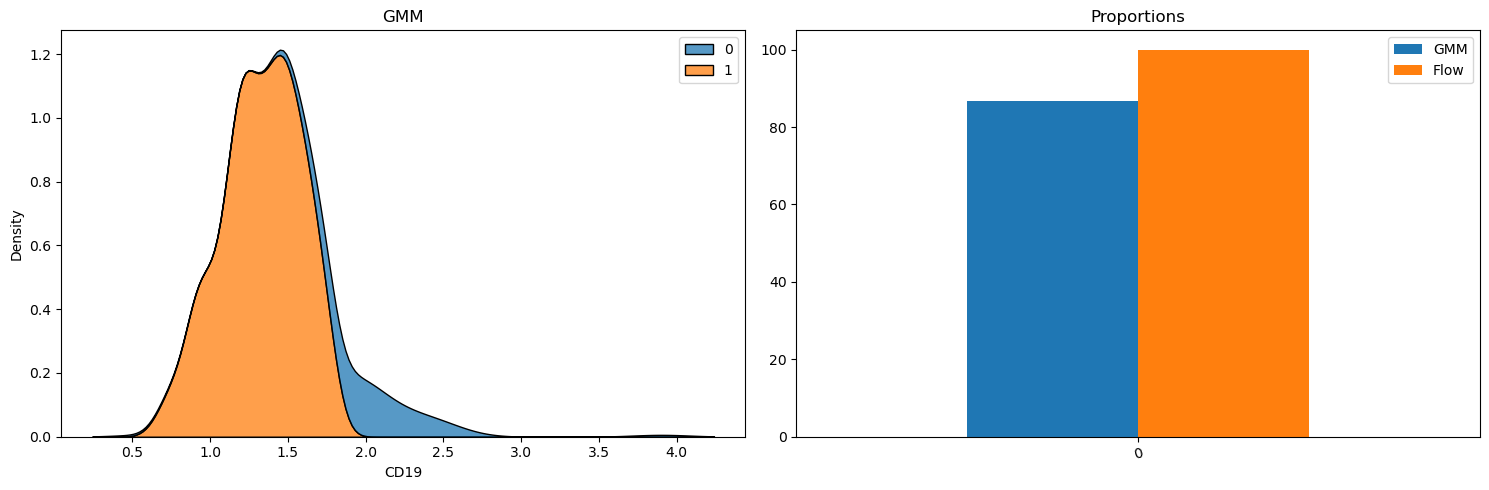

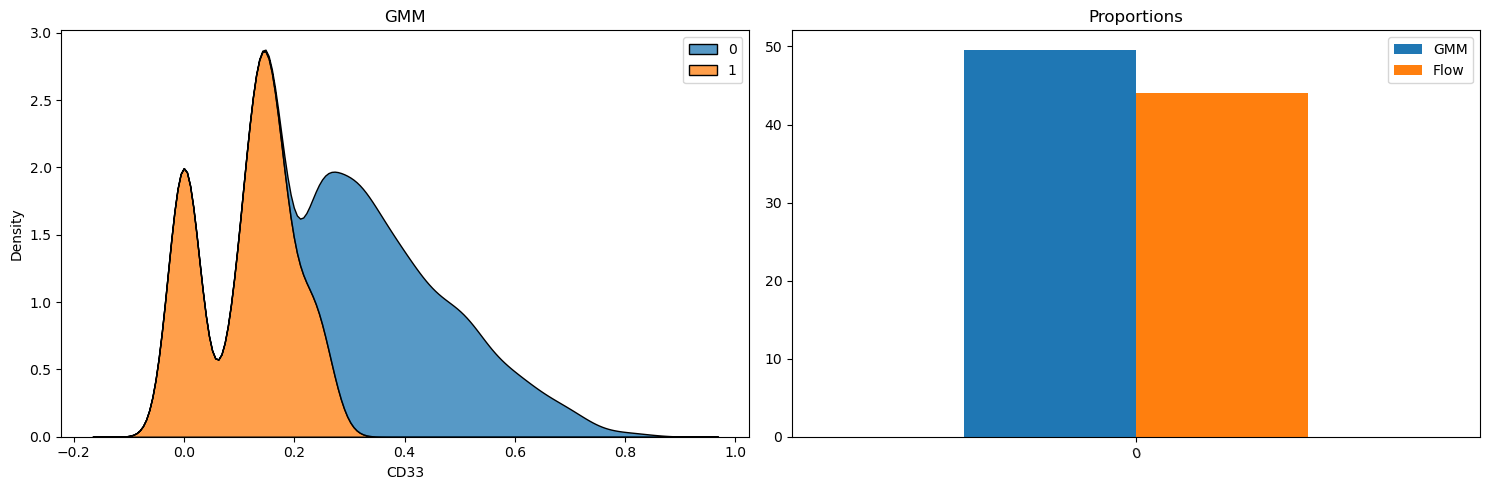

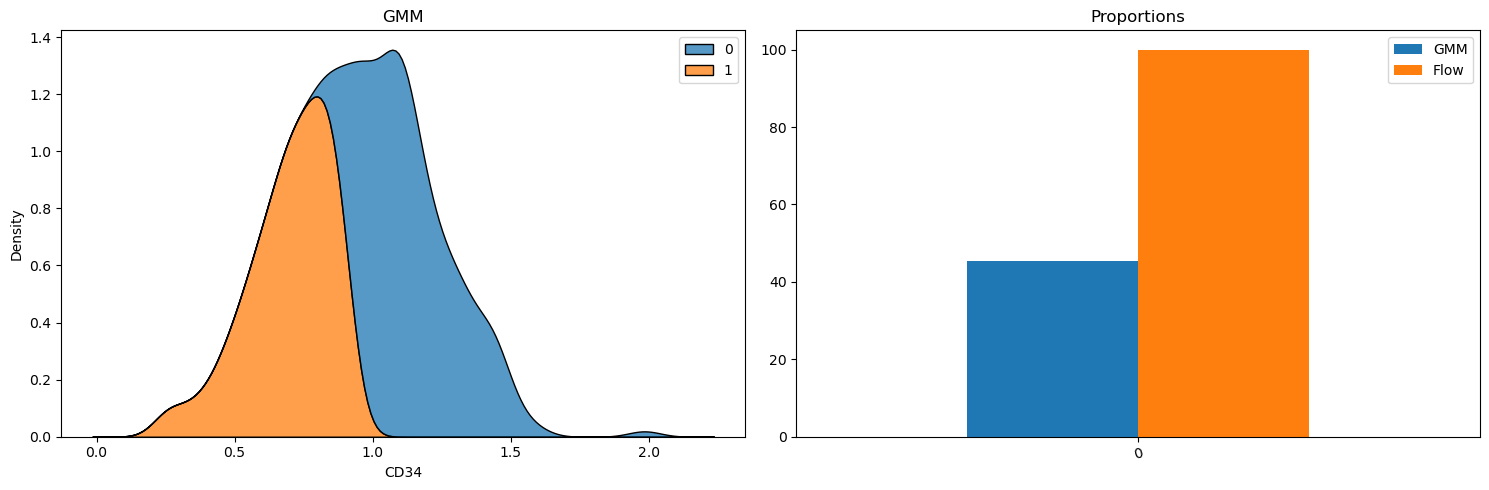

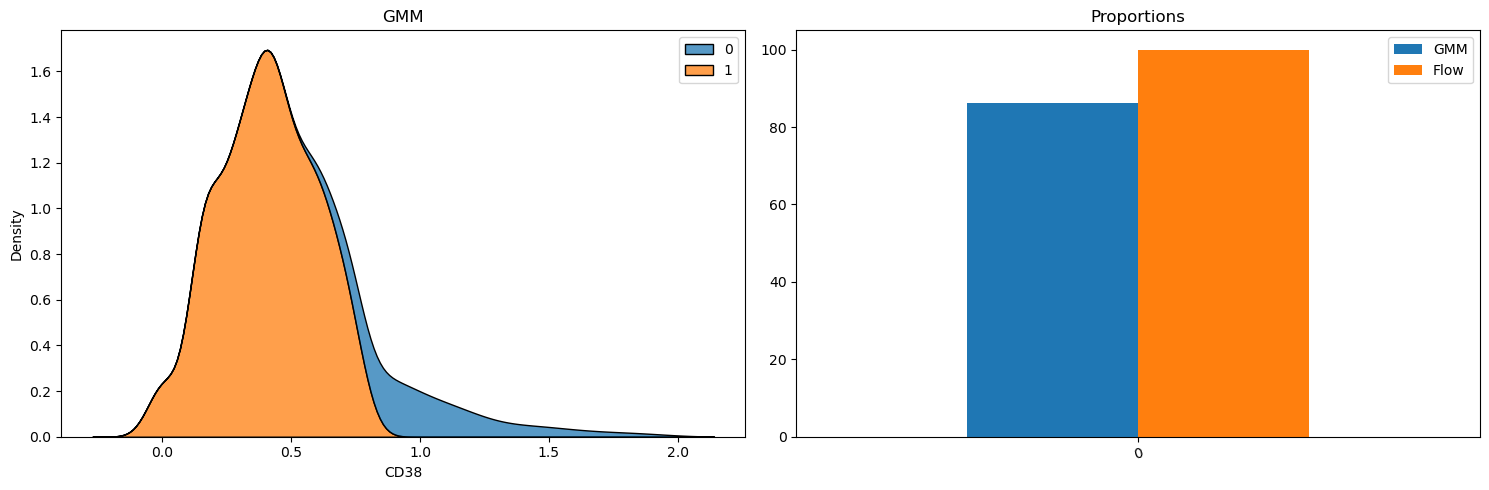

In [225]:
#Only leukemic cells selected

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data=eg_norm_blasts
n_cells=len(eg_norm_blasts)
egflow=egflow * 100 #to get percentages
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x= data[column_name]
    x=x.values.reshape(-1, 1)
    gmm.fit(x)
    labels = gmm.predict(x)
    
    ax1 = sns.kdeplot(data=data, x=column_name, hue=labels, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels==0)
    result_zeros=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels)
    result_ones=(n_ones/n_cells * 100)
    #Dataframes
    all_data = {"GMM":[result_ones],
        "Flow": egflow[column_name],
        };

    all_data= pd.DataFrame(data=all_data);
    
    ax2=all_data.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    plt.show()

### Notes:

Here CD34 is interesting, since based on flow cytometry 44% blasts were CD34 positive. Proportion is quite similar in CITE-seq. For other markers blasts were 100% positive and GMM here is forced to divide populations into 2 groups, so comparisons are not reliable. 

## DSB Normalized

In [4]:
adata_prot_dsb= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_dsb (1).h5ad')

In [5]:
eg_norm_dsb=adata_prot_dsb[adata_prot_dsb.obs['EG_code'] == 'EG21']

In [6]:
eg_norm_dsb.obs['predicted.id'].unique().tolist()

['Promonocyte',
 'Late erythoid precursor 2',
 'CD14+ monocyte 1',
 '7_immatureB',
 '4_proB_G1',
 'NK',
 'NK T 2',
 '3_proB_G2MS',
 'NK T 1',
 'Conventional dendritic cell',
 '6_preB-II_G1',
 'Early erythoid precursor',
 'HSC',
 'Plasmacytoid dendritic cell',
 'CD4+ T 3',
 'CD16+ monocyte',
 'Late erythoid precursor 1',
 'Late erythoid precursor 3']

In [243]:
#So few cells assigned as HSC, so no need to include to calculations

eg_norm_dsb[eg_norm.obs['predicted.id'] == 'HSC']

View of AnnData object with n_obs × n_vars = 4 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_scor

In [244]:
eg_norm_dsb_blasts=eg_norm_dsb[eg_norm.obs['predicted.id'] == '7_immatureB']

eg_norm_dsb_blasts=eg_norm_dsb_blasts.to_df()

eg_norm_dsb_blasts

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACCTGGTGCAACGA-1,4.438221,9.818531,0.673002,1.251178,2.093786,-0.801853,0.103473,3.892249,-0.673949,-1.143406,...,0.013102,-0.123091,0.761975,1.365123,1.904487,10.279908,0.814389,3.184479,1.122140,3.073448
AAACGGGCAAATTGCC-1,5.463347,4.972658,2.073623,1.251178,1.793434,2.093245,8.042543,2.477962,0.382520,2.947603,...,2.330204,1.809987,0.761975,0.979756,5.049341,8.914554,1.921968,4.416416,1.122140,3.290128
AAACGGGCAACACCTA-1,8.565085,11.589087,3.597984,0.519090,2.380162,0.734802,6.947437,6.255655,2.104898,0.696158,...,0.540772,0.247691,0.761975,0.326756,8.378726,14.631759,1.754297,-0.751278,-0.970308,5.562322
AAAGTAGCAAGCCCAC-1,7.560582,1.783361,15.208297,-1.148463,0.022469,0.734802,2.784077,-0.076286,1.297674,-0.181758,...,-0.556825,2.077251,-0.820336,1.365123,1.904487,20.070246,1.400199,1.727408,0.123538,0.979814
AACACGTAGGCTACGA-1,6.016994,7.294318,1.636283,1.928986,3.408543,-0.801853,8.523316,6.255655,2.826984,1.503763,...,1.032022,0.595988,0.275738,0.326756,3.401579,11.639812,1.400199,3.184479,1.122140,2.118124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCCGTGTTCCGGCA-1,6.977696,3.246576,1.170709,1.251178,-1.886838,1.462706,13.465580,3.208695,10.469584,-0.181758,...,-0.556825,0.924371,-0.820336,0.326756,1.337968,15.556311,2.539359,3.616572,1.122140,2.118124
TTGGCAAAGAGACTTA-1,0.428962,7.606183,-0.439025,-1.148463,1.477674,-1.179817,3.879184,5.712387,1.297674,0.696158,...,1.491555,0.924371,1.214650,0.555791,5.049341,8.625781,1.212798,8.267154,0.123538,0.317129
TTTACTGCAGCCTATA-1,2.604528,1.994004,0.138395,-0.276735,-0.858457,0.178627,6.826090,1.693054,0.382520,-1.143406,...,-0.556825,-0.519465,-0.249437,-1.051770,2.434431,7.100566,1.212798,1.727408,-0.970308,0.979814
TTTCCTCAGGACATTA-1,1.744193,7.371130,0.138395,-0.276735,0.419767,1.232317,6.314593,0.845288,-1.270280,-0.181758,...,0.013102,-0.945225,1.638099,-0.737840,2.434431,7.002198,-1.227995,1.176033,1.122140,4.269048


In [245]:
#Checking what king of values we have for EG24

egflow_dsb=flow[flow['EG_code'] == 'EG21'].dropna(axis=1)

egflow_dsb

,EG_code,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,EG21,1.0,1.0,1.0,0.44,1.0,1.0,1.0


In [246]:
#drop EG_code

egflow_dsb=egflow_dsb.drop("EG_code", axis=1)

egflow_dsb

,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,1.0,1.0,1.0,0.44,1.0,1.0,1.0


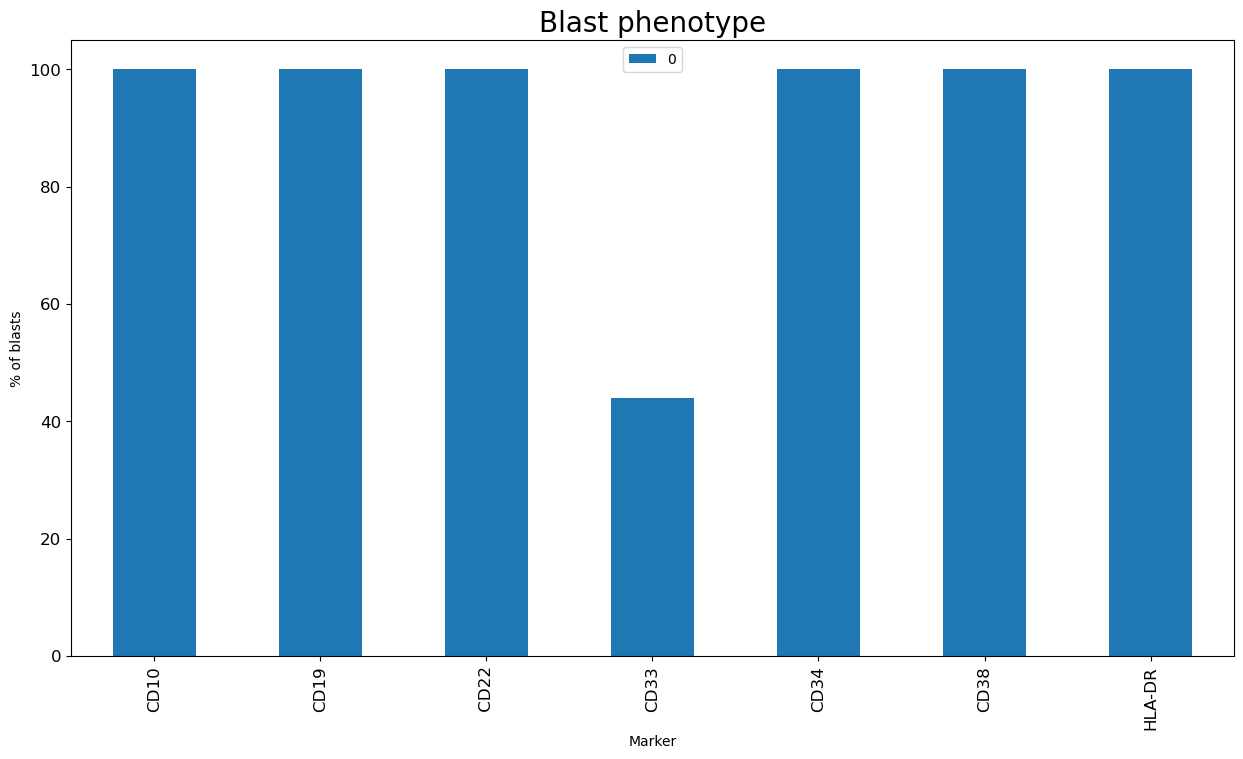

In [247]:
df=egflow_dsb * 100 #multiplied by 100 to get percentages

df1=df.T

df1.plot.bar(xlabel="Marker", ylabel="% of blasts",
            figsize= (15,8),
           fontsize="large") ;

plt.title('Blast phenotype', fontsize=20) ;

In [248]:
flow_markers_dsb=egflow_dsb.columns
flow_markers_dsb

Index(['CD10', 'CD19', ' CD22', 'CD33', 'CD34', 'CD38', 'HLA-DR'], dtype='object')

In [249]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers_dsb
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in eg_norm_dsb_blasts.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

CD10 Yes
CD19 Yes
 CD22 No
CD33 Yes
CD34 Yes
CD38 Yes
HLA-DR No
['CD10', 'CD19', 'CD33', 'CD34', 'CD38']


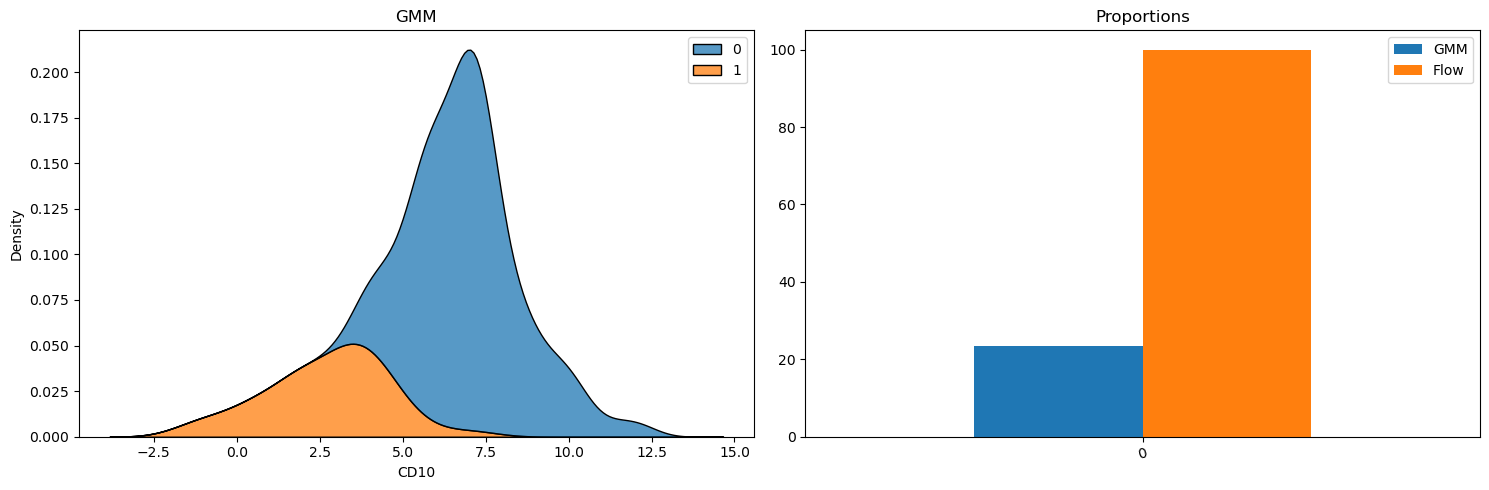

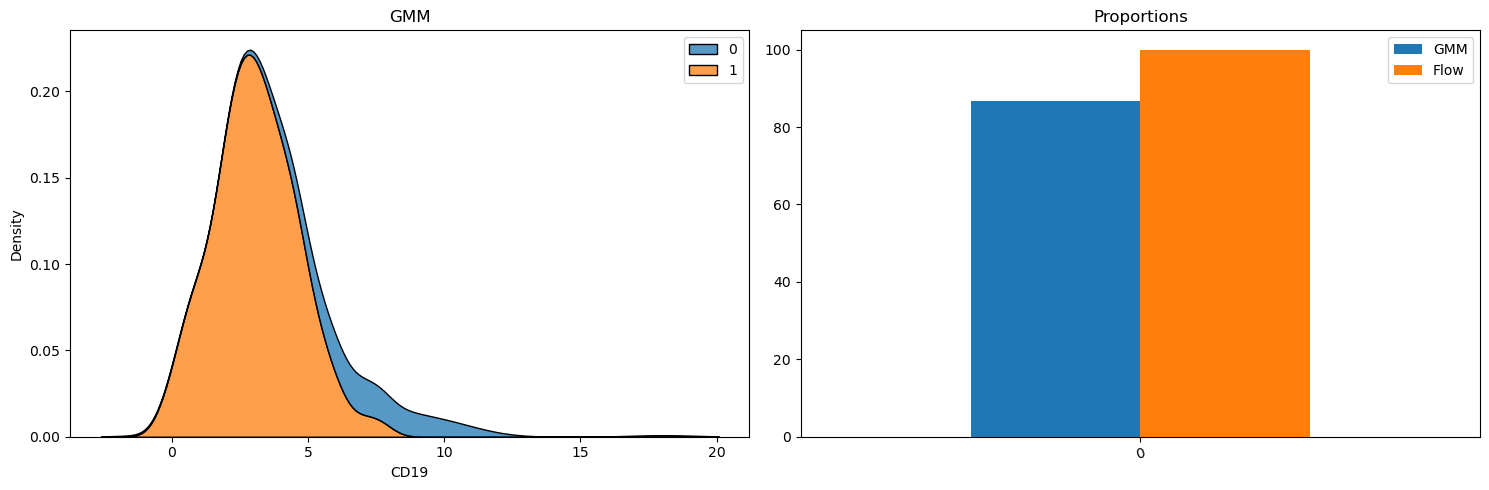

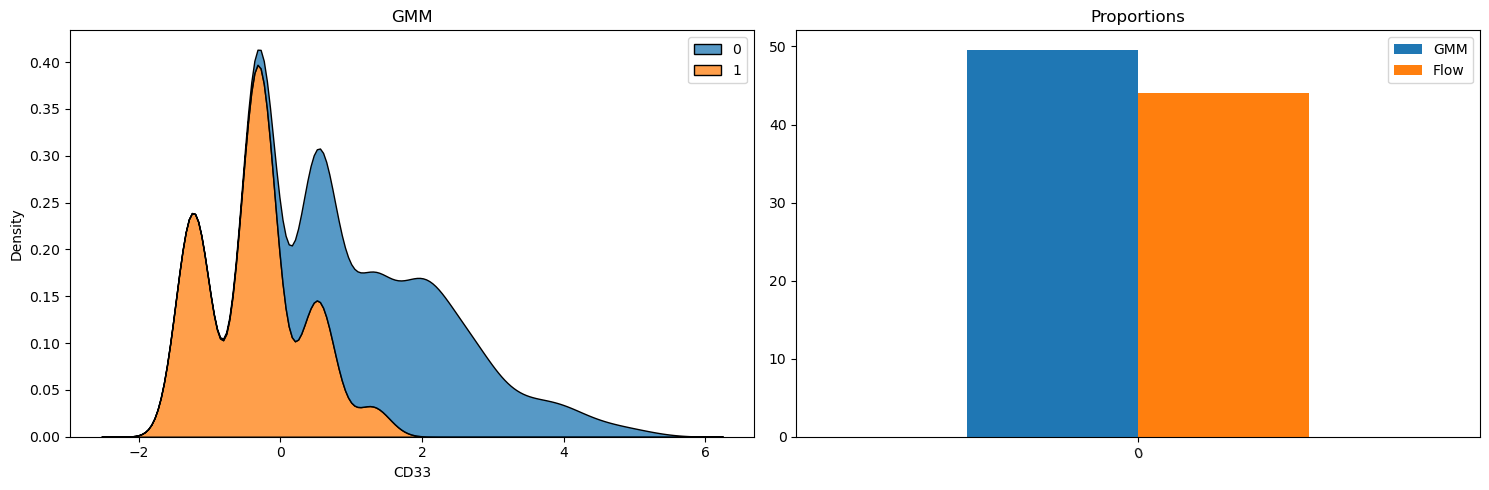

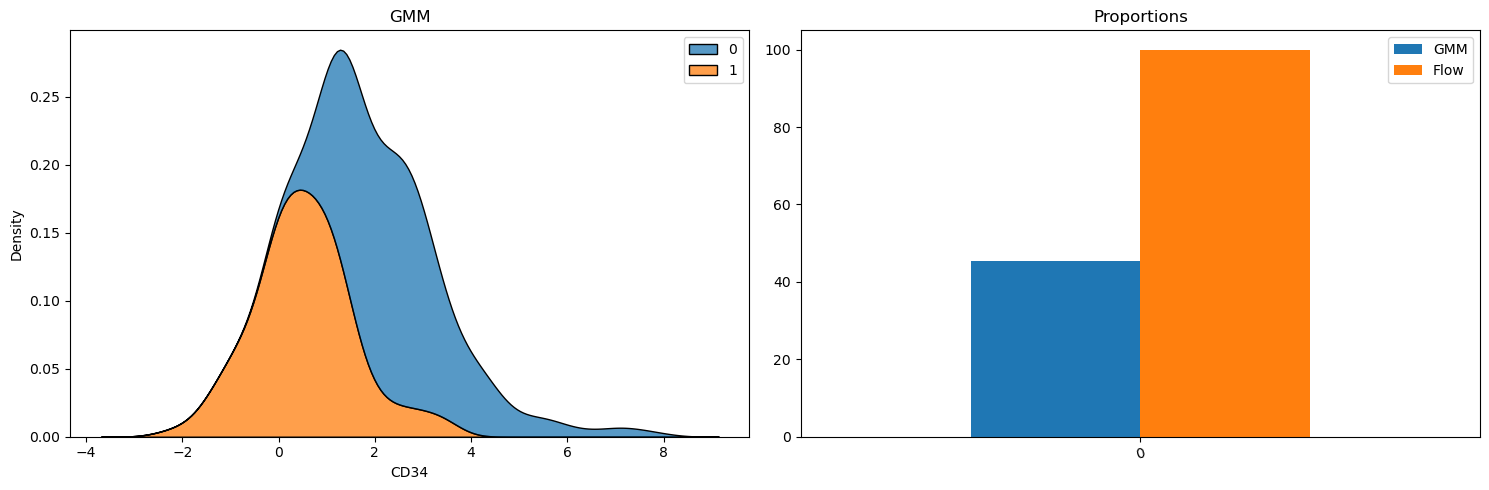

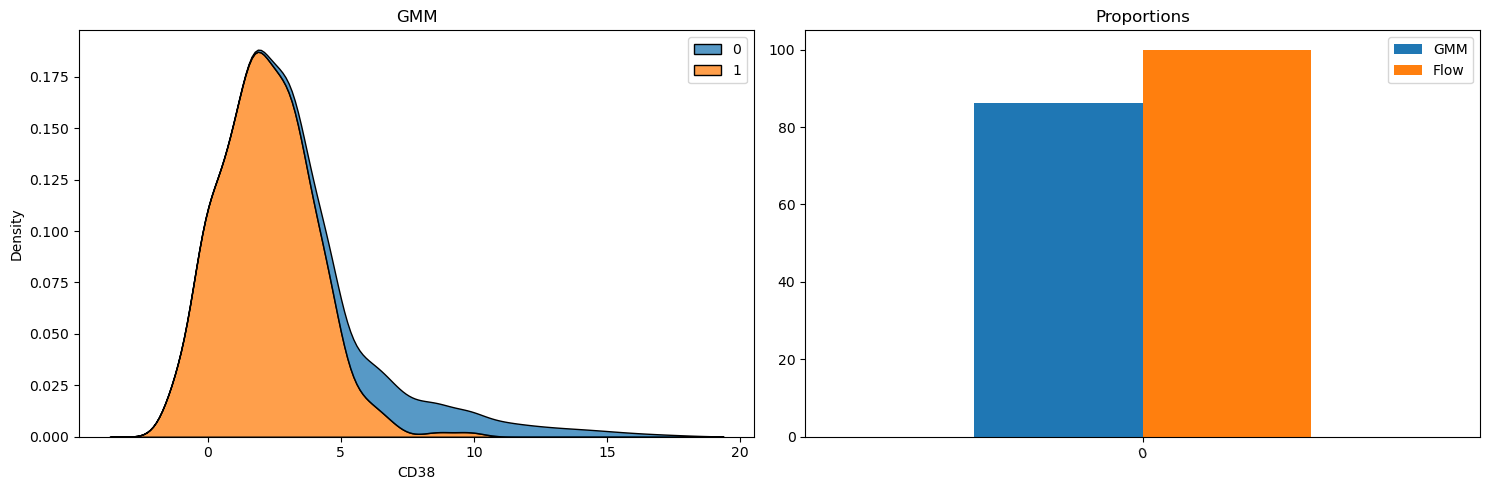

In [250]:
#Only leukemic cells selected

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data_dsb=eg_norm_dsb_blasts
n_cells=len(eg_norm_dsb_blasts)
egflow=egflow_dsb * 100 #to get percentages
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x1= data[column_name]
    x1=x1.values.reshape(-1, 1)
    gmm.fit(x1)
    labels1 = gmm.predict(x1)
    
    ax1 = sns.kdeplot(data=data_dsb, x=column_name, hue=labels1, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels1==0)
    result_zeros1=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels1)
    result_ones1=(n_ones/n_cells * 100)
    #Dataframes
    all_data1 = {"GMM":[result_ones1],
        "Flow": egflow[column_name],
        };

    all_data1= pd.DataFrame(data=all_data1);
    
    ax2=all_data1.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    plt.show()

## Preparing files

In [103]:
#get flow data

flow= pd.read_csv('/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.csv')

In [104]:
#Checking what king of values we have for EG24

egflow=flow[flow['EG_code'] == 'EG21'].dropna(axis=1)

egflow

,EG_code,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,EG21,1.0,1.0,1.0,0.44,1.0,1.0,1.0


In [105]:
#drop EG_code

egflow=egflow.drop("EG_code", axis=1)

egflow

,CD10,CD19,CD22,CD33,CD34,CD38,HLA-DR
0,1.0,1.0,1.0,0.44,1.0,1.0,1.0


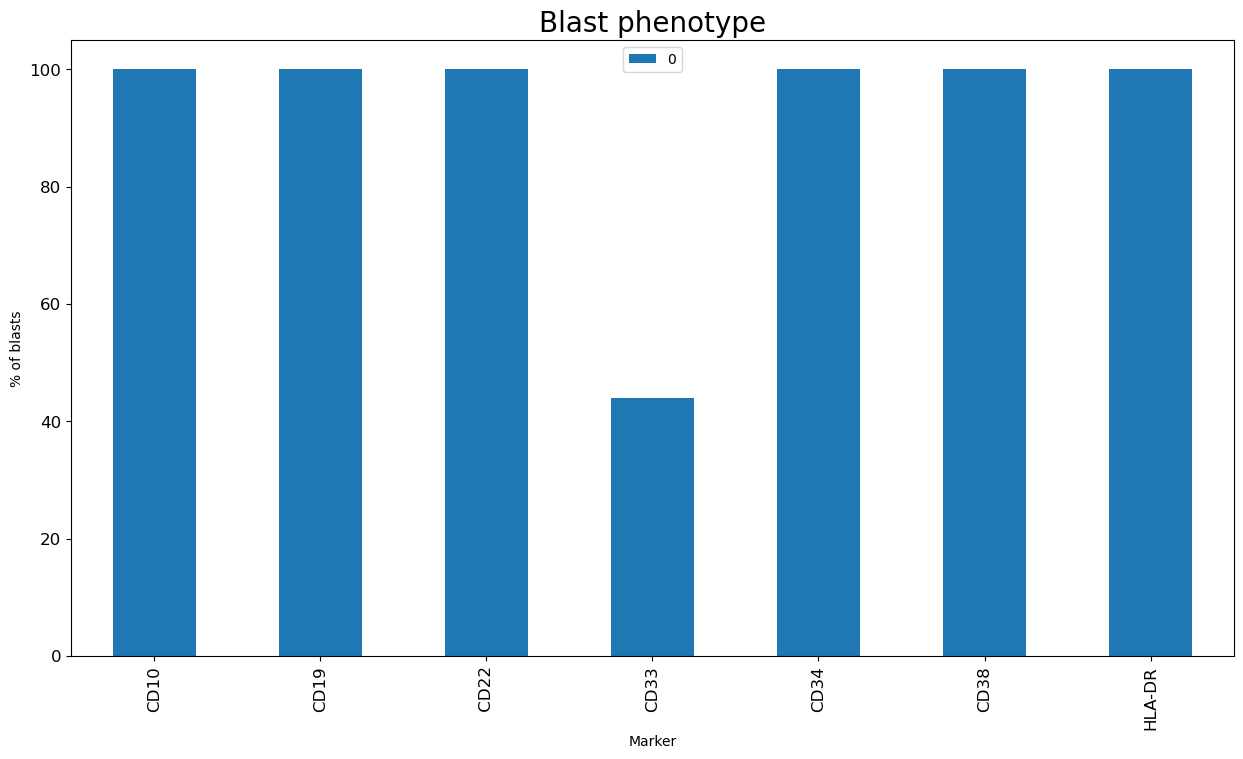

In [56]:
df=egflow * 100 #multiplied by 100 to get percentages

df1=df.T

df1.plot.bar(xlabel="Marker", ylabel="% of blasts",
            figsize= (15,8),
           fontsize="large") ;

plt.title('Blast phenotype', fontsize=20) ;

In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')

adata.shape

(298991, 8051)

In [3]:
adata

AnnData object with n_obs × n_vars = 298991 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [4]:
#select EG21 sample from big anndata file
adata_21 = adata[adata.obs.eg_code == 'EG21'].copy()

## CLR

In [5]:
#all CLR data

adata_prot_clr= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_clr (1).h5ad')

In [6]:
#selecting EG21 sample from normalized protein data

adata_21_clr = adata_prot_clr[adata_prot_clr.obs.EG_code == 'EG21']

In [7]:
adata_21

AnnData object with n_obs × n_vars = 2394 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [8]:
adata_21_clr

View of AnnData object with n_obs × n_vars = 2683 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_s

In [115]:
adata_21.obs["cell_type"] == "leukemic"

AAACCTGAGTCAAGGC-1     True
AAACCTGCAATGTAAG-1     True
AAACCTGCATGCAACT-1     True
AAACCTGGTCTGGTCG-1     True
AAACCTGGTGCAACGA-1     True
                      ...  
TTTGTCACAGTCGTGC-1     True
TTTGTCAGTCTCATCC-1     True
TTTGTCAGTGCGCTTG-1     True
TTTGTCAGTTGGACCC-1     True
TTTGTCATCAAACGGG-1    False
Name: cell_type, Length: 2394, dtype: bool

In [9]:
adata_21_clr.obs.index

Index(['AAACCTGAGTCAAGGC-1', 'AAACCTGCAATGTAAG-1', 'AAACCTGCATGCAACT-1',
       'AAACCTGGTCTGGTCG-1', 'AAACCTGGTGCAACGA-1', 'AAACGGGAGCGGATCA-1',
       'AAACGGGCAAAGCGGT-1', 'AAACGGGCAAATTGCC-1', 'AAACGGGCAACACCTA-1',
       'AAACGGGCACGAGGTA-1',
       ...
       'TTTGGTTCATGTTCCC-1', 'TTTGGTTTCAGGCGAA-1', 'TTTGGTTTCGCGGATC-1',
       'TTTGTCACAGTCGTGC-1', 'TTTGTCACATGCAATC-1', 'TTTGTCAGTCAAAGCG-1',
       'TTTGTCAGTCTCATCC-1', 'TTTGTCAGTGCGCTTG-1', 'TTTGTCAGTTGGACCC-1',
       'TTTGTCATCAAACGGG-1'],
      dtype='object', length=2683)

In [10]:
adata_21.obs.index

Index(['AAACCTGAGTCAAGGC-1-132', 'AAACCTGCAATGTAAG-1-132',
       'AAACCTGCATGCAACT-1-132', 'AAACCTGGTCTGGTCG-1-132',
       'AAACCTGGTGCAACGA-1-132', 'AAACGGGAGCGGATCA-1-132',
       'AAACGGGCAAAGCGGT-1-132', 'AAACGGGCAAATTGCC-1-132',
       'AAACGGGCAACACCTA-1-132', 'AAACGGGCACGAGGTA-1-132',
       ...
       'TTTGGTTCACCGCTAG-1-132', 'TTTGGTTCATCACGAT-1-132',
       'TTTGGTTCATGTTCCC-1-132', 'TTTGGTTTCAGGCGAA-1-132',
       'TTTGGTTTCGCGGATC-1-132', 'TTTGTCACAGTCGTGC-1-132',
       'TTTGTCAGTCTCATCC-1-132', 'TTTGTCAGTGCGCTTG-1-132',
       'TTTGTCAGTTGGACCC-1-132', 'TTTGTCATCAAACGGG-1-132'],
      dtype='object', length=2394)

In [11]:
#remove identifiers from the ends

def remove_tail(x):
    return x[:-4]
adata_21.obs.index = pd.Index(pd.Series(adata_21.obs.index).apply(remove_tail))

In [12]:
adata_21

AnnData object with n_obs × n_vars = 2394 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [13]:
adata_21_clr

View of AnnData object with n_obs × n_vars = 2683 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_s

In [14]:
#removing cells that are not common between data files

selector = adata_21_clr.obs.index.isin(adata_21.obs.index)

In [15]:
selector

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
import numpy as np

selector_test = np.array([True,True,False])

In [26]:
selector_test.sum()

2

In [22]:
selector.shape

(2683,)

In [21]:
selector.sum()

2394

In [16]:
#includes only common cells
selected_df = adata_21_clr.to_df()[selector]

In [17]:
#normalized protein counts

selected_df

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACCTGAGTCAAGGC-1,1.585178,3.925845,0.369983,0.261190,0.785678,0.557433,1.522067,0.715231,0.139098,0.139098,...,0.261190,0.557433,0.261190,0.851488,1.026343,2.627156,0.971387,0.139098,0.000000,1.644541
AAACCTGCAATGTAAG-1,1.166373,3.874398,0.219611,0.000000,1.240089,0.552031,1.595232,0.399571,0.000000,0.801087,...,0.000000,0.219611,0.399571,0.000000,0.219611,1.776958,1.000317,0.399571,0.219611,1.595232
AAACCTGCATGCAACT-1,1.306791,3.190385,0.388973,0.000000,0.949680,0.746412,0.746412,0.000000,0.668306,0.275339,...,0.746412,0.746412,0.275339,0.388973,0.746412,1.306791,0.949680,0.388973,0.000000,1.118529
AAACCTGGTCTGGTCG-1,1.441796,4.764038,0.173869,0.000000,0.667571,0.565084,1.127812,0.321937,0.173869,0.000000,...,0.760523,0.565084,0.450883,0.173869,0.760523,1.983298,1.395845,0.760523,0.173869,1.607011
AAACCTGGTGCAACGA-1,1.595911,4.454080,0.445859,0.351624,0.934145,0.351624,0.611257,0.611257,0.247575,0.000000,...,0.351624,0.531974,0.445859,1.038845,0.531974,2.623339,1.038845,0.753142,0.247575,1.220176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAGTCGTGC-1,1.897901,4.123756,0.135783,0.362069,0.702121,0.627326,2.501298,0.897853,0.546481,0.000000,...,0.362069,0.546481,0.135783,0.135783,0.836769,2.743628,1.469015,0.135783,0.135783,1.202048
TTTGTCAGTCTCATCC-1,1.178223,3.234642,0.446062,0.202826,1.068602,0.805014,1.366901,0.290645,0.202826,0.446062,...,0.753441,0.945468,0.202826,0.699064,0.202826,1.907157,1.596361,0.446062,0.202826,1.245150
TTTGTCAGTGCGCTTG-1,1.250635,4.134897,0.153726,0.404473,0.509635,0.771586,0.978968,0.286938,0.286938,0.286938,...,0.404473,0.845596,0.286938,0.509635,0.978968,2.941616,1.096627,0.691658,0.000000,1.150641
TTTGTCAGTTGGACCC-1,1.254844,3.313349,0.471097,0.337305,0.406437,1.031492,1.413190,0.471097,0.743464,0.406437,...,0.589082,0.471097,0.337305,0.743464,0.337305,1.760268,1.742868,0.263037,0.263037,0.834556


In [19]:
adata_21.obsm['protein_expression_clr'] = selected_df

adata_21.obsm

AxisArrays with keys: X_pca, X_totalVI, X_umap, protein_expression, protein_expression_clr

In [30]:
selected_df.index

Index(['AAACCTGAGTCAAGGC-1', 'AAACCTGCAATGTAAG-1', 'AAACCTGCATGCAACT-1',
       'AAACCTGGTCTGGTCG-1', 'AAACCTGGTGCAACGA-1', 'AAACGGGAGCGGATCA-1',
       'AAACGGGCAAAGCGGT-1', 'AAACGGGCAAATTGCC-1', 'AAACGGGCAACACCTA-1',
       'AAACGGGCACGAGGTA-1',
       ...
       'TTTGGTTCACCGCTAG-1', 'TTTGGTTCATCACGAT-1', 'TTTGGTTCATGTTCCC-1',
       'TTTGGTTTCAGGCGAA-1', 'TTTGGTTTCGCGGATC-1', 'TTTGTCACAGTCGTGC-1',
       'TTTGTCAGTCTCATCC-1', 'TTTGTCAGTGCGCTTG-1', 'TTTGTCAGTTGGACCC-1',
       'TTTGTCATCAAACGGG-1'],
      dtype='object', length=2394)

In [31]:
adata_21.obs.index

Index(['AAACCTGAGTCAAGGC-1', 'AAACCTGCAATGTAAG-1', 'AAACCTGCATGCAACT-1',
       'AAACCTGGTCTGGTCG-1', 'AAACCTGGTGCAACGA-1', 'AAACGGGAGCGGATCA-1',
       'AAACGGGCAAAGCGGT-1', 'AAACGGGCAAATTGCC-1', 'AAACGGGCAACACCTA-1',
       'AAACGGGCACGAGGTA-1',
       ...
       'TTTGGTTCACCGCTAG-1', 'TTTGGTTCATCACGAT-1', 'TTTGGTTCATGTTCCC-1',
       'TTTGGTTTCAGGCGAA-1', 'TTTGGTTTCGCGGATC-1', 'TTTGTCACAGTCGTGC-1',
       'TTTGTCAGTCTCATCC-1', 'TTTGTCAGTGCGCTTG-1', 'TTTGTCAGTTGGACCC-1',
       'TTTGTCATCAAACGGG-1'],
      dtype='object', length=2394)

In [22]:
adata_21.obs["cell_type"].unique

['leukemic', 'leukemic?', 'doublets?', 'NKT', 'non-leukemic']
Categories (5, object): ['NKT', 'doublets?', 'leukemic', 'leukemic?', 'non-leukemic']

In [38]:
adata_21_leukemic = adata_21[adata_21.obs.cell_type == 'leukemic']

eg21_blasts_clr=adata_21_leukemic.obsm['protein_expression']

In [39]:
eg21_blasts_clr

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
AAACCTGAGTCAAGGC-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,28,333,0,5,9,1
AAACCTGCAATGTAAG-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,192,0,1,0,2
AAACCTGCATGCAACT-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,13,147,0,7,3,3
AAACCTGGTCTGGTCG-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,21,612,0,4,1,6
AAACCTGGTGCAACGA-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,17,605,0,5,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCGCGGATC-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,6,134,0,4,7,2
TTTGTCACAGTCGTGC-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,16,418,0,5,1,1
TTTGTCAGTCTCATCC-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,22,217,0,14,9,5
TTTGTCAGTGCGCTTG-1-132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,13,370,0,8,4,6


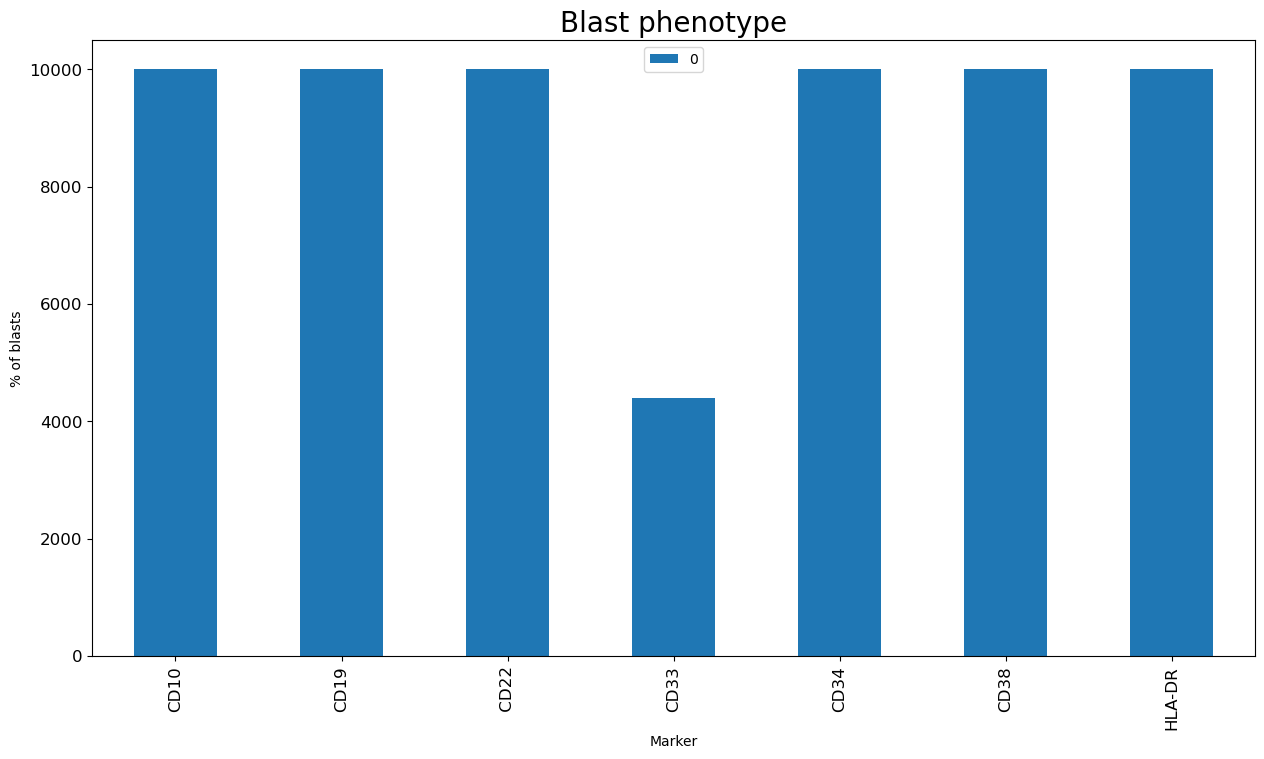

In [52]:
df=egflow * 100 #multiplied by 100 to get percentages

df1=df.T

df1.plot.bar(xlabel="Marker", ylabel="% of blasts",
            figsize= (15,8),
           fontsize="large") ;

plt.title('Blast phenotype', fontsize=20) ;

In [41]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in eg21_blasts_clr.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

CD10 Yes
CD19 Yes
 CD22 No
CD33 Yes
CD34 Yes
CD38 Yes
HLA-DR Yes
['CD10', 'CD19', 'CD33', 'CD34', 'CD38', 'HLA-DR']


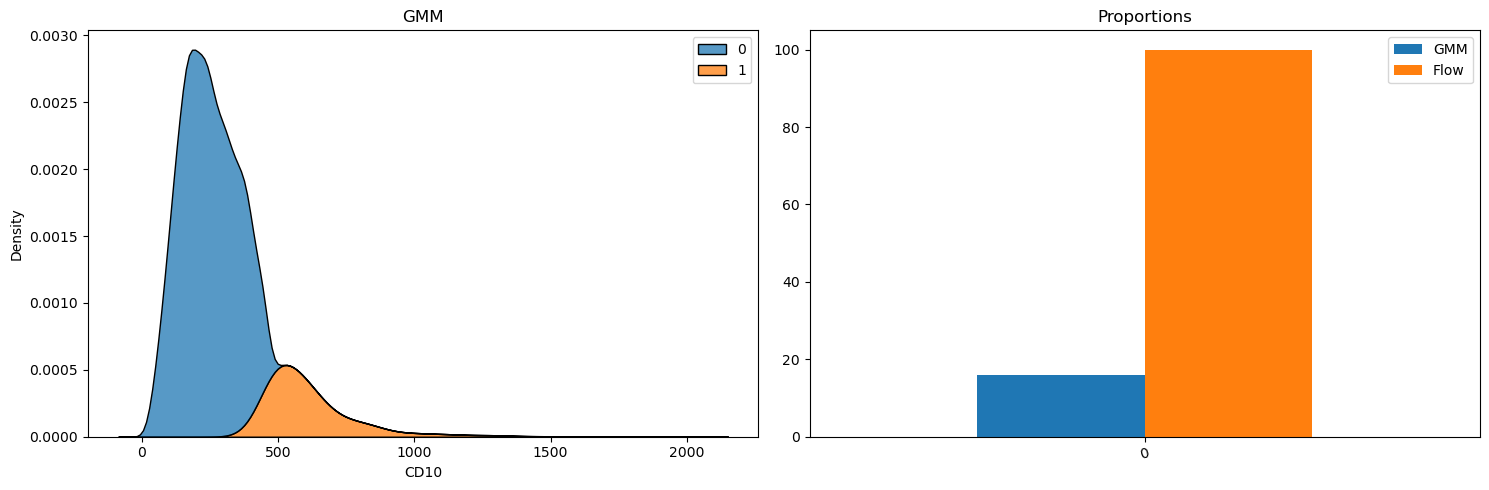

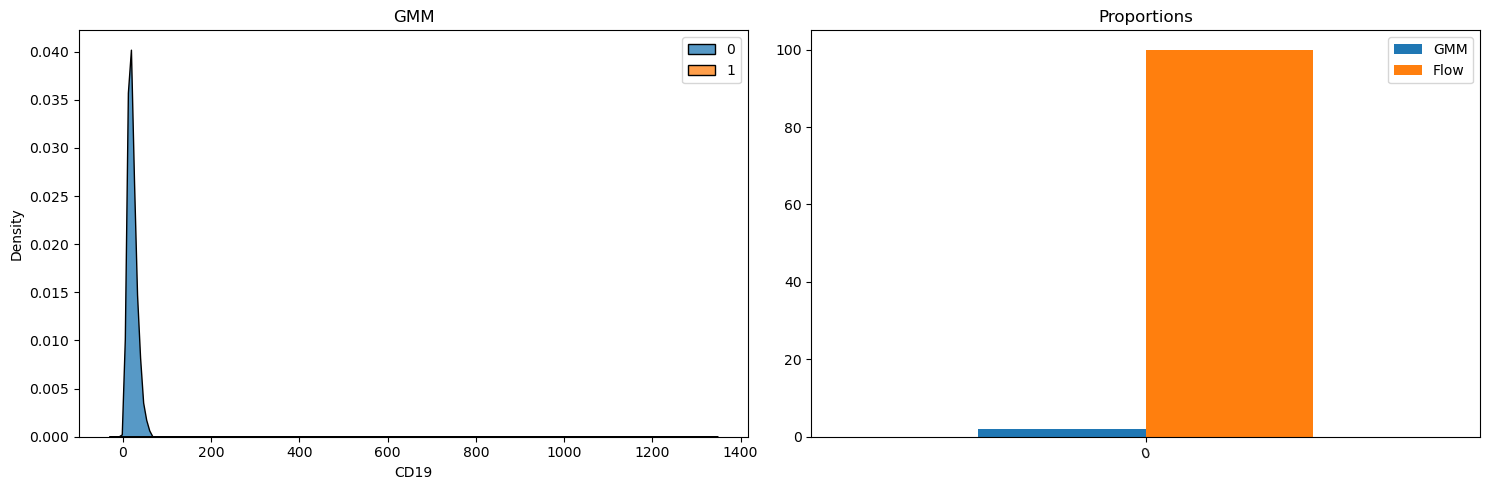

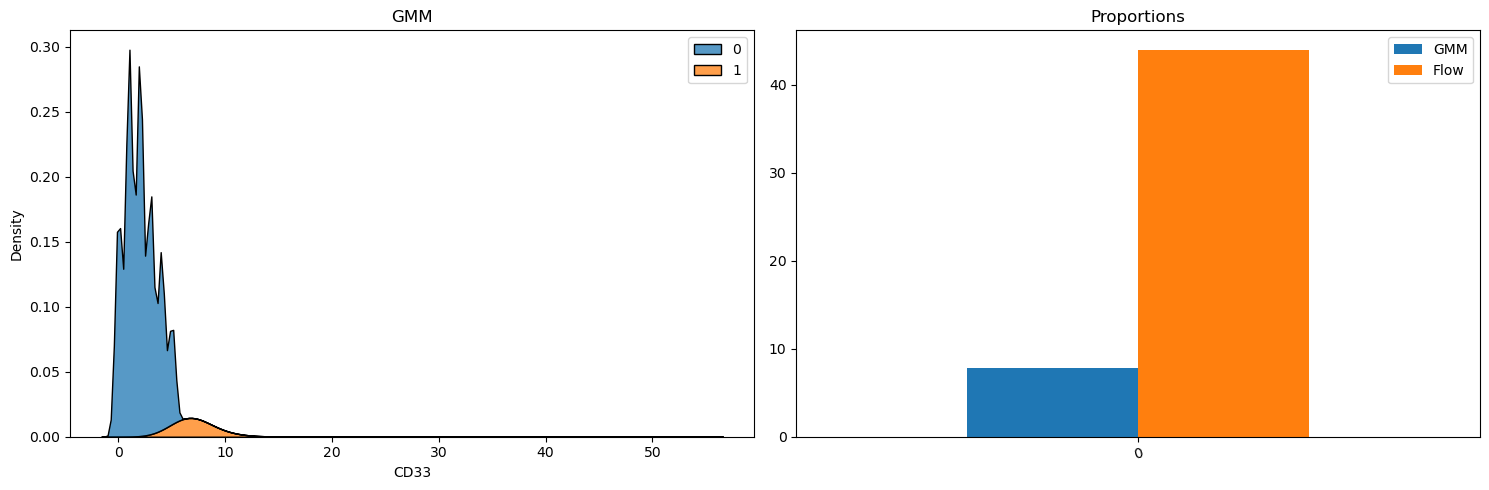

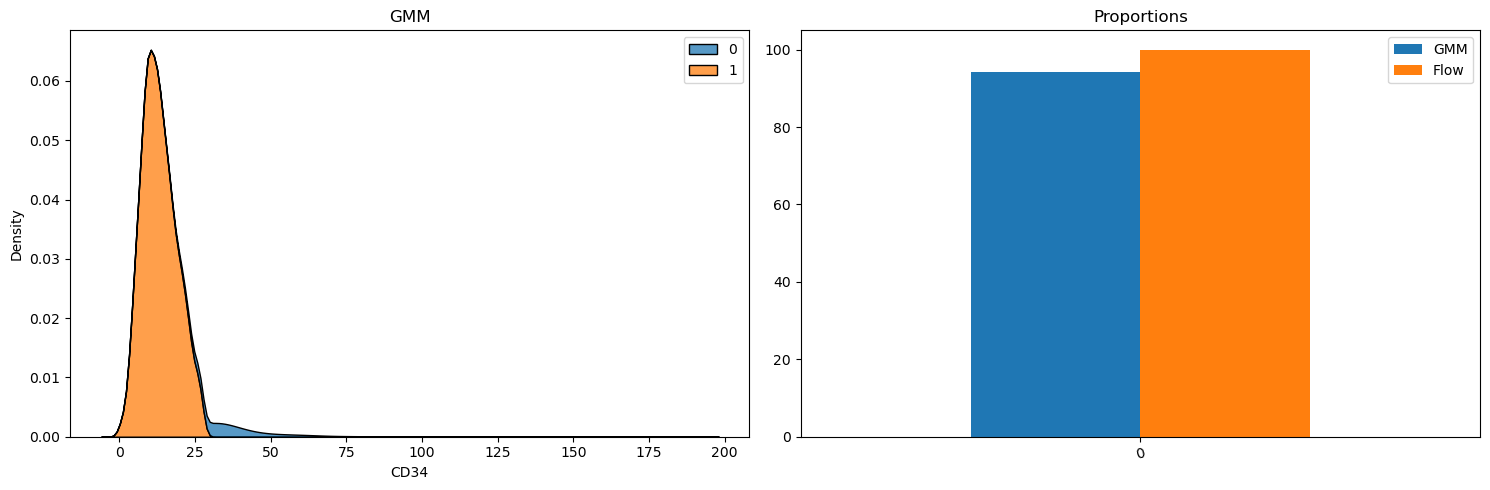

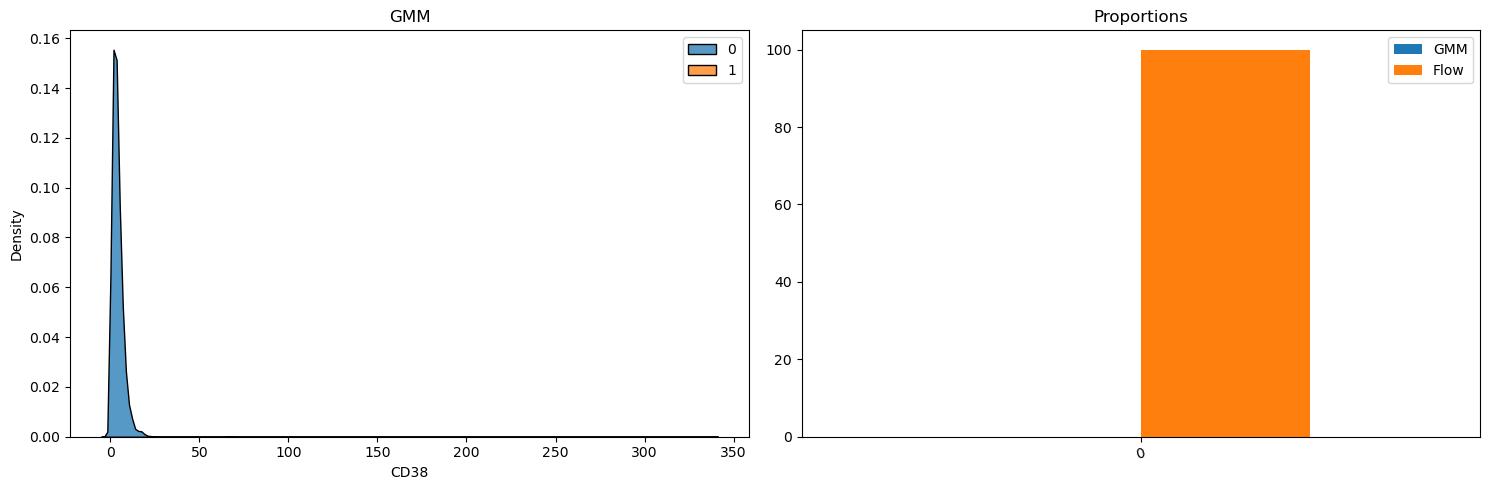

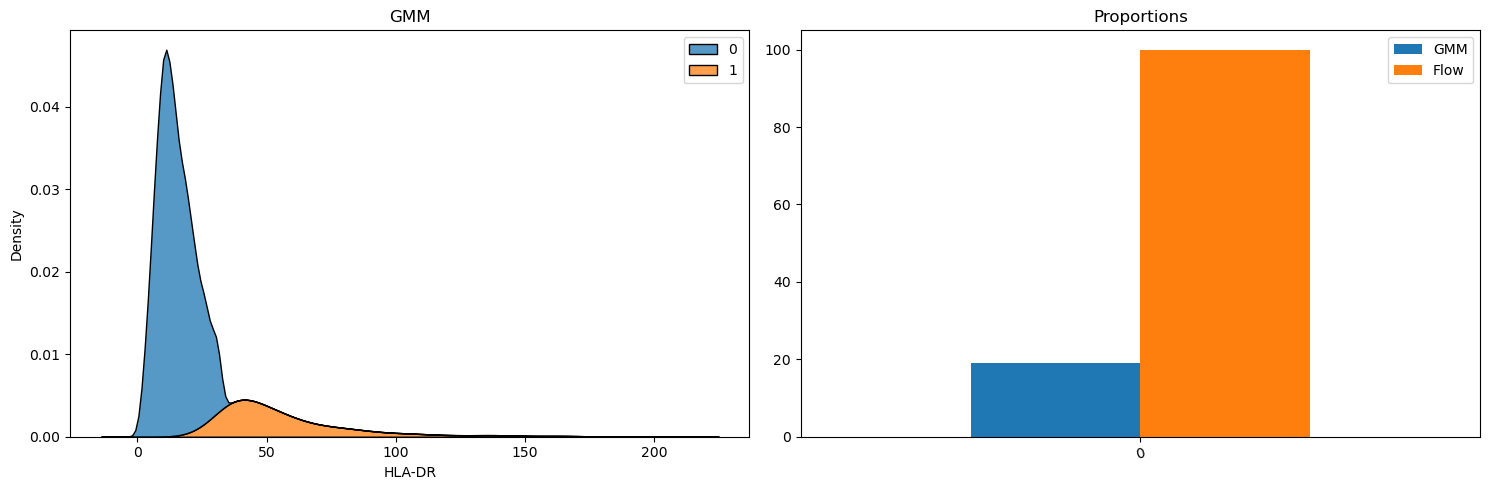

In [51]:
#Only leukemic cells selected

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data=eg21_blasts_clr
n_cells=len(eg21_blasts_clr)
egflow=egflow * 100 #to get percentages
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x= data[column_name]
    x=x.values.reshape(-1, 1)
    gmm.fit(x)
    labels = gmm.predict(x)
    
    ax1 = sns.kdeplot(data=data, x=column_name, hue=labels, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels==0)
    result_zeros=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzearo(labels)
    result_ones=(n_ones/n_cells * 100)
    #Dataframes
    all_data = {"GMM":[result_ones],
        "Flow": egflow[column_name],
        };

    all_data= pd.DataFrame(data=all_data);
    
    ax2=all_data.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    plt.show()

## DSB

In [74]:
adata_prot_dsb= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_dsb (1).h5ad')

In [80]:
adata_21_dsb=adata_prot_dsb[adata_prot_dsb.obs['EG_code'] == 'EG21']

In [83]:
adata_21_dsb.copy()

AnnData object with n_obs × n_vars = 2683 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_score', '

In [84]:
adata_21

AnnData object with n_obs × n_vars = 2394 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr'
    obsp: 'connectivities', 'distances'

In [85]:
adata_21.obs.index

Index(['AAACCTGAGTCAAGGC-1', 'AAACCTGCAATGTAAG-1', 'AAACCTGCATGCAACT-1',
       'AAACCTGGTCTGGTCG-1', 'AAACCTGGTGCAACGA-1', 'AAACGGGAGCGGATCA-1',
       'AAACGGGCAAAGCGGT-1', 'AAACGGGCAAATTGCC-1', 'AAACGGGCAACACCTA-1',
       'AAACGGGCACGAGGTA-1',
       ...
       'TTTGGTTCACCGCTAG-1', 'TTTGGTTCATCACGAT-1', 'TTTGGTTCATGTTCCC-1',
       'TTTGGTTTCAGGCGAA-1', 'TTTGGTTTCGCGGATC-1', 'TTTGTCACAGTCGTGC-1',
       'TTTGTCAGTCTCATCC-1', 'TTTGTCAGTGCGCTTG-1', 'TTTGTCAGTTGGACCC-1',
       'TTTGTCATCAAACGGG-1'],
      dtype='object', length=2394)

In [86]:
adata_21_dsb.obs.index

Index(['AAACCTGAGTCAAGGC-1', 'AAACCTGCAATGTAAG-1', 'AAACCTGCATGCAACT-1',
       'AAACCTGGTCTGGTCG-1', 'AAACCTGGTGCAACGA-1', 'AAACGGGAGCGGATCA-1',
       'AAACGGGCAAAGCGGT-1', 'AAACGGGCAAATTGCC-1', 'AAACGGGCAACACCTA-1',
       'AAACGGGCACGAGGTA-1',
       ...
       'TTTGGTTCATGTTCCC-1', 'TTTGGTTTCAGGCGAA-1', 'TTTGGTTTCGCGGATC-1',
       'TTTGTCACAGTCGTGC-1', 'TTTGTCACATGCAATC-1', 'TTTGTCAGTCAAAGCG-1',
       'TTTGTCAGTCTCATCC-1', 'TTTGTCAGTGCGCTTG-1', 'TTTGTCAGTTGGACCC-1',
       'TTTGTCATCAAACGGG-1'],
      dtype='object', length=2683)

In [87]:
#removing cells that are not common between data files

selector = adata_21_dsb.obs.index.isin(adata_21.obs.index)

In [88]:
#includes only common cells
selected_df = adata_21_dsb.to_df()[selector]

In [89]:
selected_df.shape

(2394, 33)

In [90]:
adata_21.obsm['protein_expression_dsb'] = selected_df

adata_21.obsm

AxisArrays with keys: X_pca, X_totalVI, X_umap, protein_expression, protein_expression_clr, protein_expression_dsb

In [94]:
adata_21_leukemic

View of AnnData object with n_obs × n_vars = 2105 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [116]:
eg21_blasts_dsb=adata_21_leukemic.obsm['protein_expression_dsb']

In [117]:
eg21_blasts_dsb.shape

(2105, 33)

In [118]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in eg21_blasts_dsb.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

CD10 Yes
CD19 Yes
 CD22 No
CD33 Yes
CD34 Yes
CD38 Yes
HLA-DR No
['CD10', 'CD19', 'CD33', 'CD34', 'CD38']


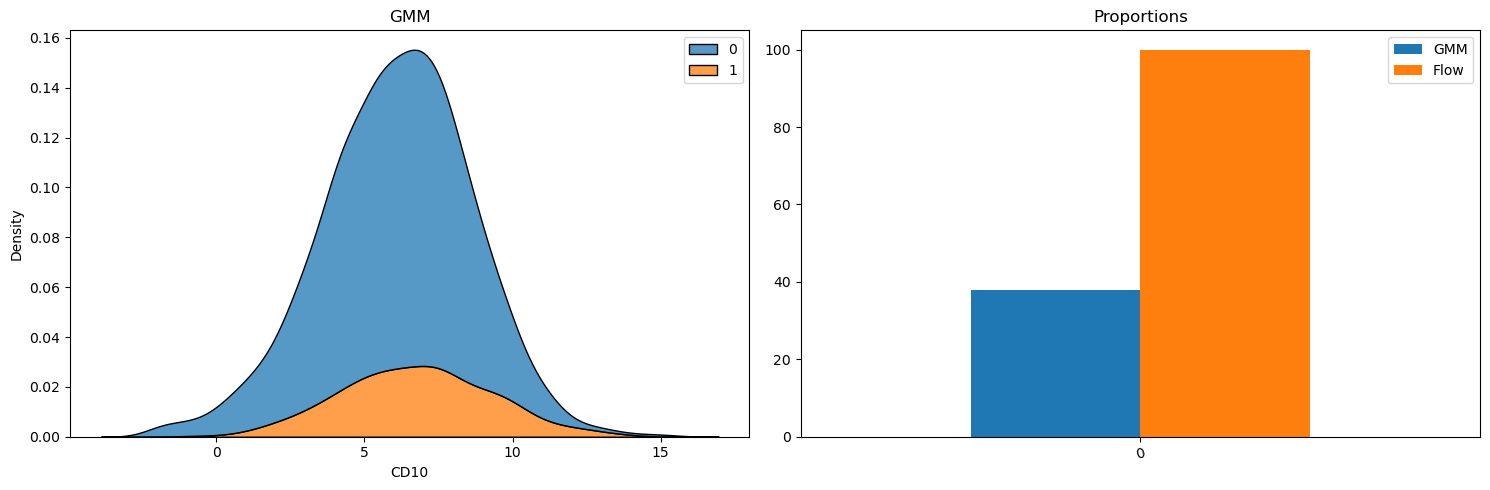

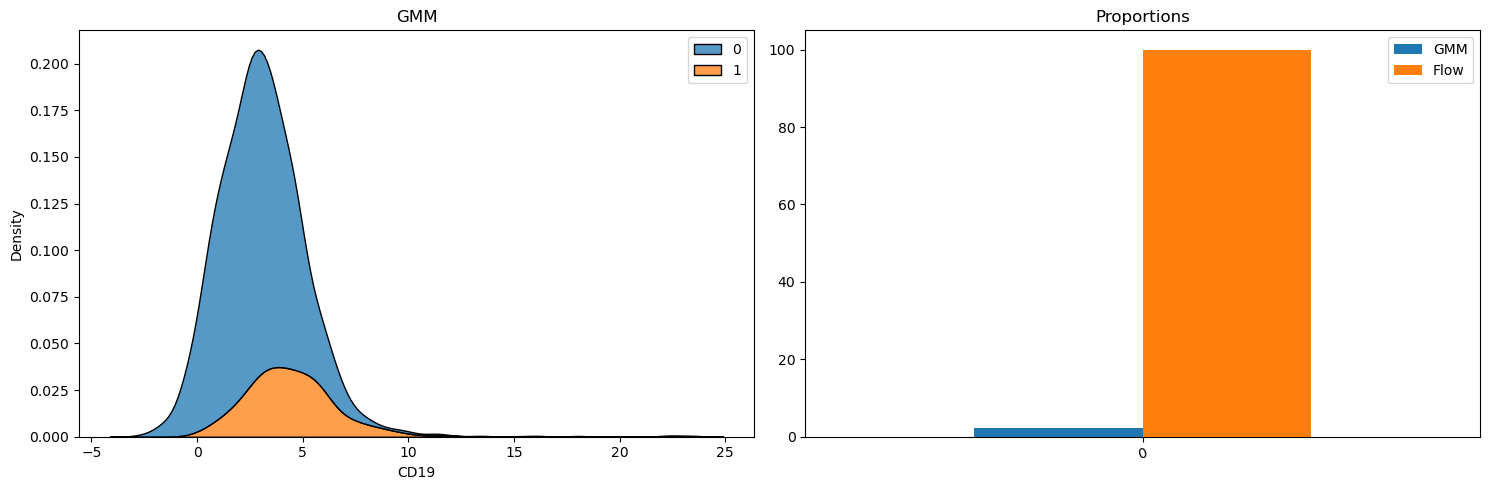

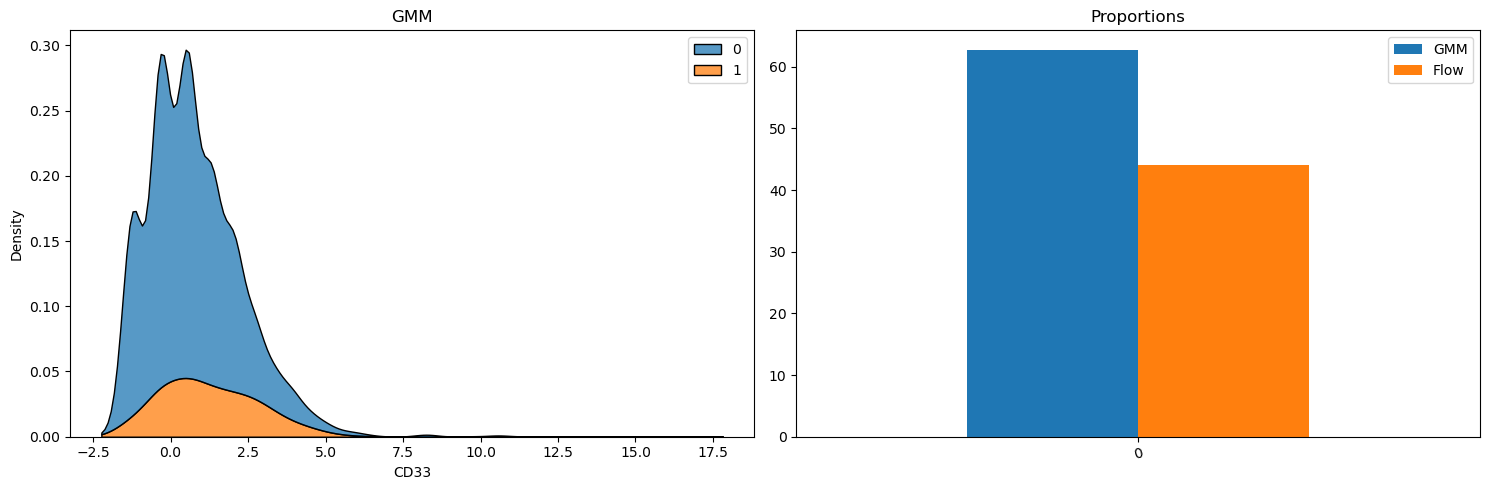

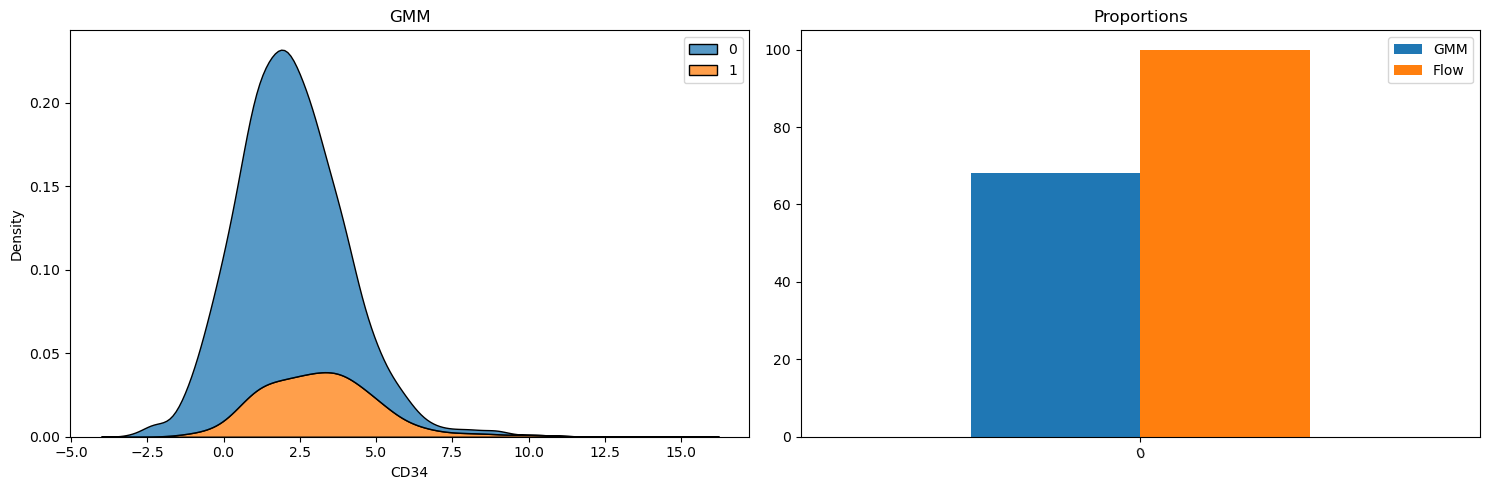

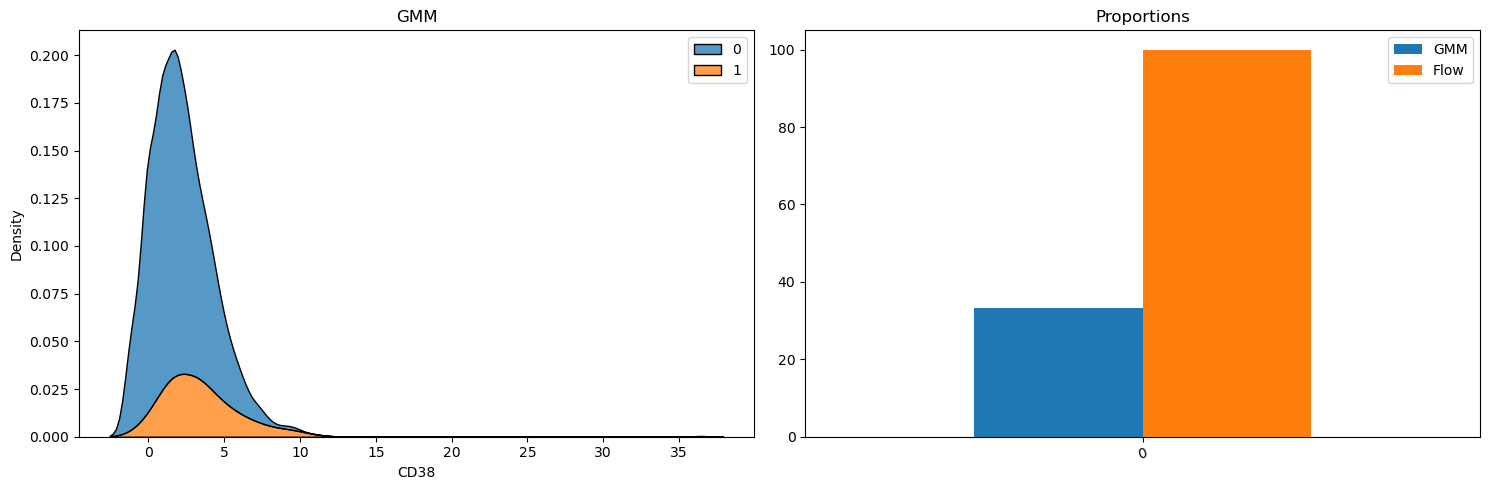

In [119]:
#Only leukemic cells selected

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data=eg21_blasts_dsb
n_cells=len(eg21_blasts_dsb)
egflow=egflow #* 100 #to get percentages
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x1= data[column_name]
    x1=x1.values.reshape(-1, 1)
    gmm.fit(x1)
    labels1 = gmm.predict(x1)
    
    ax1 = sns.kdeplot(data=data, x=column_name, hue=labels, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros1 = np.count_nonzero(labels1==0)
    result_zeros1=(n_zeros1/n_cells * 100)
    #Calculate ones
    n_ones1=np.count_nonzero(labels1)
    result_ones1=(n_ones1/n_cells * 100)
    #Dataframes
    all_data1 = {"GMM":[result_ones1],
        "Flow": egflow[column_name],
        };

    all_data1= pd.DataFrame(data=all_data1);
    
    ax2=all_data1.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    plt.show()